### Building interactive visualization to display the characterization of cancer patients and cell line samples.  

#### Background information

Cancer starts when healthy cells mutate in a way that disrupts the normal function of the human body. When the body's natural process of controlling cell division fails, damaged cells can grow abnormally and create cancerous cells.

Cell lines have been used to test preclinical medicines and assist research in finding treatments for cancer. However, when cell lines undergo multiple re-culturing processes in a laboratory, they sometimes develop mutational profiles that are not in line with those of cancer patients. 

This project aims to discover some of the genes with mutations similar to those in the cell lines and patient samples. By building a statistical model that will assist in choosing the best-fit cell line for the cancer type in question, the experiment will be more relativistic and reproducible.

The statistical analysis will perform a proportional frequency analysis for cell lines and tissue samples and a chi-square test to identify significant associations between cancer and gene mutation types.

#### List of datasets

The project will use five datasets:
>1. Cell-line mutation: contains 477 samples of 95 gene mutations and 15 cancer types.
>2. Cell-line annotation: 97 features that describe each sample
>3. Patient mutation: contains 7259 samples of 95 gene mutations
>4. Patient annotation: 17 features to describe the 7259 samples
>5. Mutation annotation: 95 genes, three mutation types

The 95 gene mutation profiles are based on 15 cancer tissue types. The table below shows the cancer tissue types and the number of samples under each tissue type for both samples.

<img src=project1.png>



#### Statistical Data Analysis

The data analysis begins by categorizing the mutation percentage into four categories based on the mutation proportion within the cell and patient mutation datasets. This mutation proportion is a key indicator of the prevalence of specific mutations within the cells, providing valuable insights into the nature of the mutations. 

Categorizing the gene mutation percentage for the given gene will assist in analyzing the extent of a particular gene mutation in each sample. Further grouping of the mutations based on the cancer types of each observation for both cell and patient datasets will reveal whether some mutations are present in both cell lines and patient tissue samples in the respective cancer types.



### Packages that needed to be Downloaded
1. ordered_list

In [10]:
#pip install ordered_set

In [11]:
#Abstract class

In [12]:
from abc import ABCMeta, abstractmethod
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 

In [13]:
# Templete Class for the cell and patient sample
class EDA:
   
    __metaclass__ = ABCMeta
    
    @abstractmethod
    def __init__(self):
        pass
    
    @abstractmethod
    def transpose(self):
        pass
    
    @abstractmethod
    def to_lyst(self):
        pass
    
    @abstractmethod
    def unique_value_lists(self):
        pass
    
    @abstractmethod
    def array_to_df(self):
        pass
    
    @abstractmethod
    def add_column(self):
        pass
    
    @abstractmethod
    def grouping(self):
        pass
    
    @abstractmethod
    def grouping_by_number(self):
        pass
    
    @abstractmethod
    def catagorise(self):
        pass
    
    @abstractmethod
    def add_column_name(self):
        pass
    
    @abstractmethod
    def transopse(self):
        pass
    
    @abstractmethod
    def re_set_index(self):
        pass
    
    @abstractmethod
    def rename_column(self):
        pass
        
    @abstractmethod
    def pick_column(self):
        pass
    
    @abstractmethod
    def group_by_tissue(self):
        pass

    @abstractmethod
    def get_df(self):
        pass
    
    @abstractmethod
    def count_catagories(self):
        pass
    
    @abstractmethod
    def df_length(self):
        pass
    
    @abstractmethod
    def convert_binary(self):
        pass
    
    @abstractmethod
    def group_by_cancer_type(self):
        pass
    
    @abstractmethod
    def group_by_mutation_level(self):
        pass
    
    @abstractmethod
    def binary_df(self):
        pass
  

##### Functional classes for cell-line, patient tissue sample, annotation and chi-square test.

In [14]:
class CellLine(EDA):
         
    def __init__(self, data, sep, header=None):
        self.df = pd.read_csv(data, header=None, sep=sep).round(3).transpose()
        
    def get_df(self):
        return self.df  
    
    def to_lyst(self, col):
        df = self.df[col].to_list()
        return df
    
    def unique_value_lists(self):
        for column in self.df.columns:
            uniq_list = self.df[column].unique()
        return uniq_list
    
    def add_column(self, colname, value):
        self.df[colname] =value
        return self.df
    
    
    def transopse(self):
        return self.df.transpose()

    def grouping(self): 
        df1 = self.df.copy()
        df1 = np.where((df1 < 0.06), 1, df1)
        df2 = np.where(((df1 > 0.05) & (df1 <= 0.15)), 2, df1)
        df3 = np.where (((df2 > 0.15) & (df2 <= 0.65)), 3, df2)
        df4 = np.where (((df3 > 0.65) & (df3 < 1.0)), 4 , df3)
        
        df1 = df4.copy().astype(str)
        df1 = np.where(df1 == '1.0', 'No', df1)
        df2 = np.where(df1 == '2.0', 'Low', df1)
        df3 = np.where(df2 == '3.0', 'Medium', df2)
        df4 = np.where(df3 == '4.0', 'High', df3)
        self.df = pd.DataFrame(df4)
        
        return self.df
    
    
    def grouping_by_number(self):
        df1 = self.df.copy()
        df1 = np.where((df1 < 0.06), 1, df1)
        df2 = np.where(((df1 > 0.05) & (df1 <= 0.15)), 2, df1)
        df3 = np.where (((df2 > 0.15) & (df2 <= 0.65)), 3, df2)
        df4 = np.where (((df3 > 0.65) & (df3 < 1.0)), 4 , df3) 
        self.df = pd.DataFrame(df4)
        return self.df
    
    def rename_column(self, cols):
        self.df.columns = cols
        return self.df
    

    def count_categories(self, valuesToCount):
        value = self.df[self.df == valuesToCount].count()
        return value
    
    def df_length(self):
        length = len(self.df)
        return length
    
    def convert_binary(self):
        df1 = self.df.copy()
        df1 = np.where((df1 >= 0.05), 1, df1)
        df1 = np.where(((df1 > 0.00) & (df1 < 0.05)), 0, df1).astype('float32')
    
        return df1
    
    def group_by_tissue (self, column_name, row_name):
        df = self.df.loc[self.df[column_name]== row_name]   
        return df
    
    def group_by_cancer_type(self, lyst, col_name):
        self.grouped_cancer_types = []
        for i in lyst:
            i = CellLine.group_by_tissue(self, col_name, i)
            self.grouped_cancer_types.append(i) 
        return self.grouped_cancer_types
    
    def group_by_mutation_level(self, value):
        
        df = self.df[self.df == value]
        return df
    def pick_column(self, col):
        col = self.df[col]
        return col

In [15]:
class TissueSample(EDA):
    
    def __init__(self, data, sep, header=None):
        self.df = pd.read_csv(data, header=None, sep=sep).round(3).transpose()
        
    def get_df(self):
        return self.df
    
    def to_lyst(self, col):
        df_list = self.df[col].to_list()
        return df_list
    
    def unique_value_lists(self, unique_value):
        value_list = self.df[unique_value].unique().tolist()
        return value_list
    
    def add_column(self, colname, value):
        self.df[colname] =value
        return self.df
    
    def transopse(self):
        return self.df.transpose()
    
    def grouping(self):
        df1 = self.df.copy()
        df1 = np.where((df1 < 0.06), 1, df1)
        df2 = np.where(((df1 > 0.05) & (df1 <= 0.15)), 2, df1)
        df3 = np.where (((df2 > 0.15) & (df2 <= 0.65)), 3, df2)
        df4 = np.where (((df3 > 0.65) & (df3 < 1.0)), 4 , df3)
        
        df11 = df4.copy().astype(str)
        df11 = np.where(df11 == '1.0', 'No', df11)
        df22 = np.where(df11 == '2.0', 'Low', df11)
        df33 = np.where(df22 == '3.0', 'Medium', df22)
        df44 = np.where(df33 == '4.0', 'High', df33)
        self.df = pd.DataFrame(df44)
        
        return self.df
    
    def grouping_by_number(self):
        df1 = self.df.copy()
        df1 = np.where((df1 < 0.06), 1, df1)
        df2 = np.where(((df1 > 0.05) & (df1 <= 0.15)), 2, df1)
        df3 = np.where (((df2 > 0.15) & (df2 <= 0.65)), 3, df2)
        df4 = np.where (((df3 > 0.65) & (df3 < 1.0)), 4 , df3) 
        self.df = pd.DataFrame(df4)
        return self.df
    
    def count_categories(self, valuesToCount):
        value = self.df[self.df == valuesToCount].count()
        return value
    
    def convert_binary(self):
        df1 = self.df.copy()
        df2 = np.where((df1 >= 0.05), 1, df1)
        self.df = np.where(((df2 > 0.00) & (df2 < 0.05)), 0, df2).astype('float32')
        
        return self.df
    
     
    
    def df_length(self):
        length = len(self.df)
        return length
    
    def rename_column(self, cols):
        self.df.columns = cols # type: ignore
        return self.df
    
    def group_by_tissue (self, column_name, row_name):
        df = self.df[self.df[column_name]== row_name]   
        return df
    
    def group_by_cancer_type(self, lyst, col_name):
        grouped_cancer_types = []
        for i in lyst:
            i = TissueSample.group_by_tissue(self, col_name, i)
            grouped_cancer_types.append(i)
        return grouped_cancer_types
    
    def group_by_mutation_level(self, value):
        
        df = self.df[self.df == value]
        return df

In [16]:
class Annotation(EDA):
    def __init__(self, data, sep, header):
        self.df = pd.read_csv(data, header=header, sep=sep).round(3)
        
    def get_df(self):
        return self.df
    
    def to_lyst(self, df_col):
        new_lyst = self.df[df_col].to_list()
        return new_lyst
    
    def pick_column(self, col):
        col = self.df[col]
        return col

In [17]:
class ChiSquareIndependence(CellLine):
    def __init__(self, no, low, med, high):
        self.no = no
        self.low = low
        self.med = med
        self.high = high
        self.df =  pd.DataFrame([self.no, self.low, self.med, self.high]).transpose()
        
        
    def get_mutation_level(self):
        return {'no':self.no, 'low': self.low, 'medium': self.med, 'high': self.high}
    
    def observed_values_df(self):
        df = pd.DataFrame(self.df.iloc[:,:-1].sum(axis=0))
        return df 
    
    def df_concat(self):
        df = pd.concat([self], axis=1)  


#### Dataframe objects

In [18]:
#load mutation annotation
mut_anno = Annotation('MutationAnnotation.tsv', '\t', header=0)

#load cell line annotation
cell_anno = Annotation('CellLineAnnotation.tsv', '\t', header=0)

#Load the patient tissue sample annotation
tissue_anno = Annotation('PatientAnnotation.tsv', '\t', header=0)


#save the mutation list and the cancer types for both samples in a list
mut_level = ['No', 'Low', 'Medium','High']
mutation_list = mut_anno.to_lyst('symbol')
cell_cancer_type = cell_anno.to_lyst('tissue')
tissue_cancer_type = tissue_anno.to_lyst('tissue')


#### Proportional mutation analysis
The samples are grouped in two ways:

1. Four levels (no, low, medium, and high mutations), this is used to perform proportional analysis, statistical tests, and plotting .

2. In two levels, mutated or not mutated (this is used for plotting graphs to show the mutation profiles in general; it is done by adding the low, medium, and high mutations to represent samples that are mutated over 5%).

Tasks to perform:

1. Grouping of the mutation types for cell line and patient tissue dataset
2. Count the wild and mutated samples
3. perform proportional analysis on the level of mutations
4. perform proportional analysis based on cancer types for both samples


##### 1. Count

In [19]:
#Catagorise mutational level and count
#cell line(four levels)

#load cell_line data
cell = CellLine('CellLine_Mutations.tsv','\t')

cell_group = cell.grouping()

#count mutation frequencies 
cell_no= cell.count_categories('No')
cell_low = cell.count_categories('Low')
cell_medium = cell.count_categories('Medium')
cell_high = cell.count_categories('High')

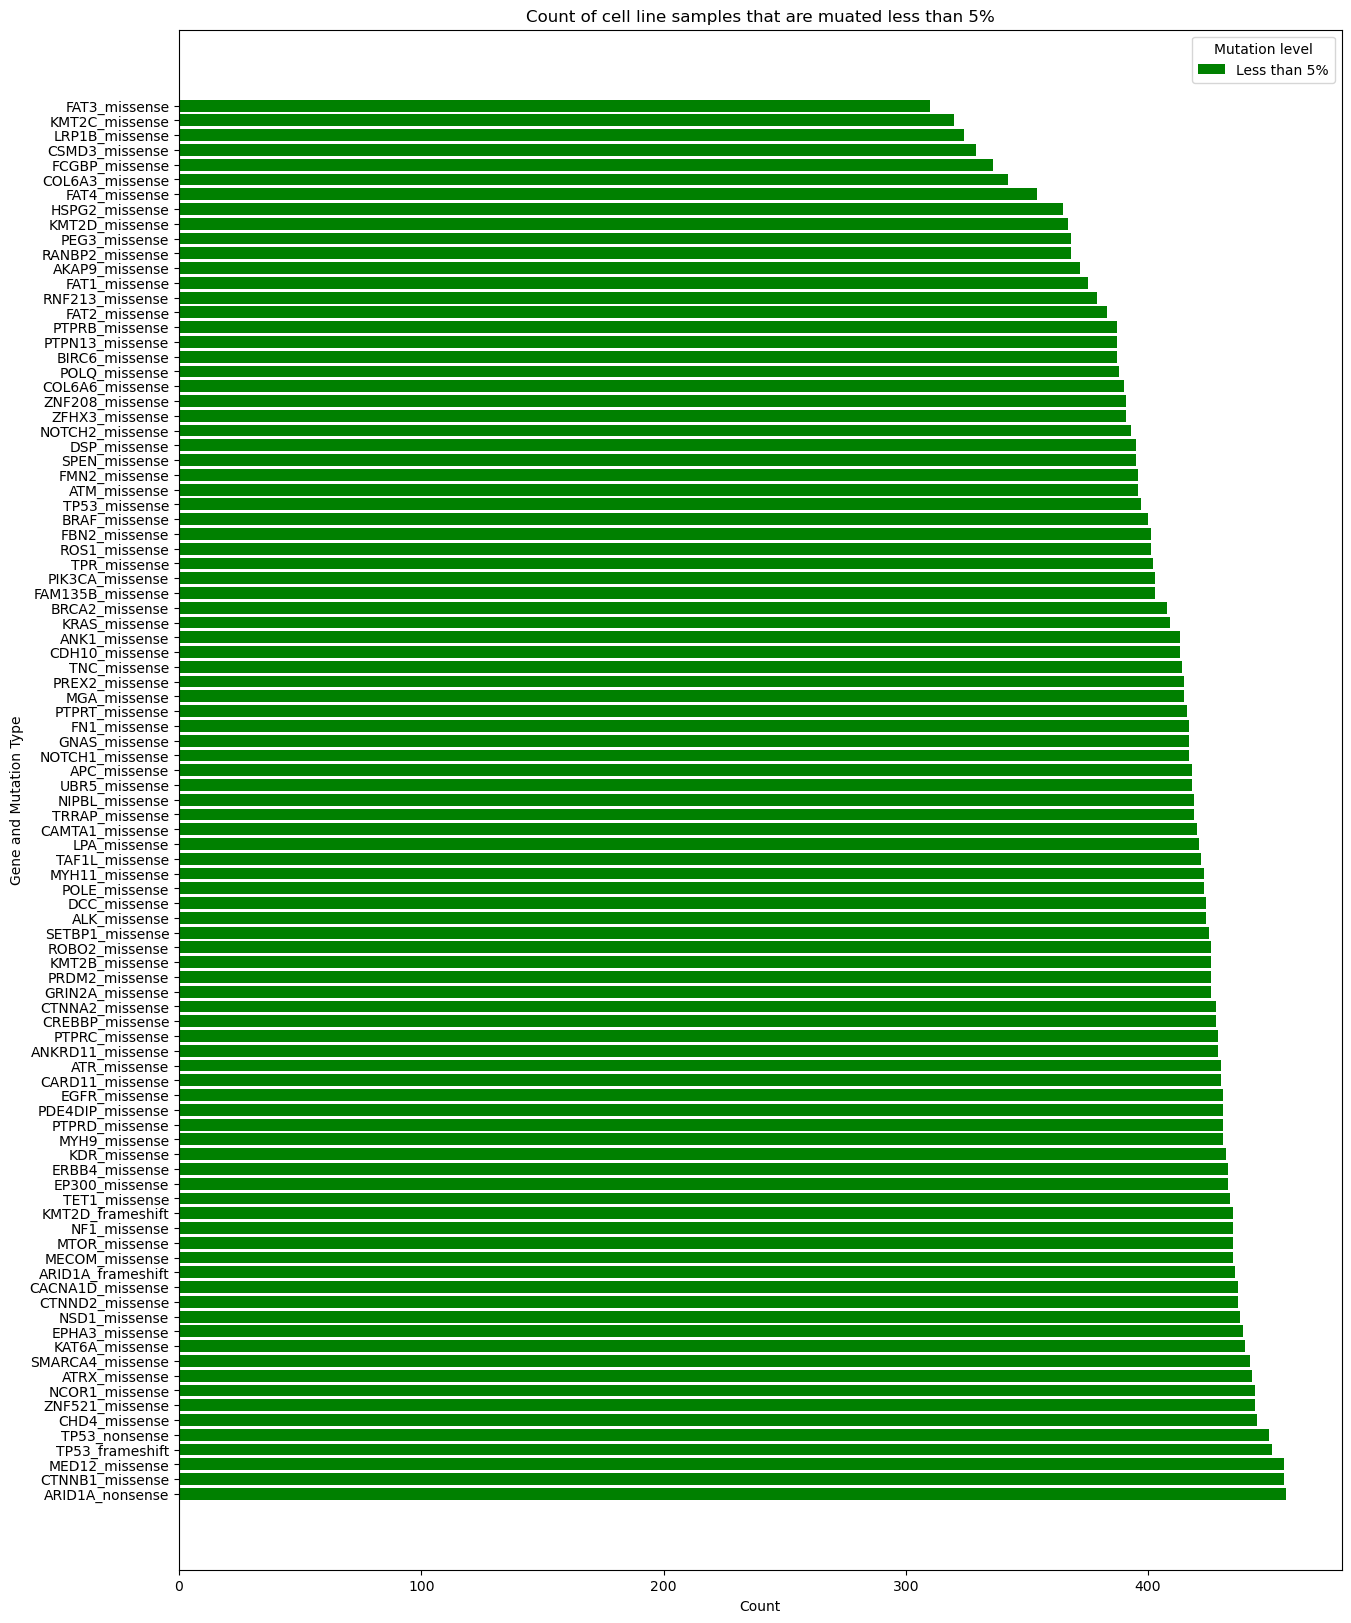

In [20]:
#plot the count of the catagories 
#cellline (no mutation - less than 5 %)
cell_count_no_df = pd.DataFrame([mutation_list, cell_no]).transpose()
cell_count_no_df.columns = ['Gene and Mutation type', 'Less than 5%']


#bar graph
plt.figure(figsize=(15, 20))
wild_mutation_cell = cell_count_no_df.sort_values(by= 'Less than 5%', ascending=False) #sort values
plt.barh(wild_mutation_cell['Gene and Mutation type'], wild_mutation_cell['Less than 5%'], color='green', label = 'Less than 5%' )

plt.xlabel('Count')
plt.ylabel('Gene and Mutation Type')
plt.title('Count of cell line samples that are muated less than 5%')
plt.legend(title='Mutation level',)
#plt.savefig('final_plots/cell_line_wild_mutation.png')
plt.show()

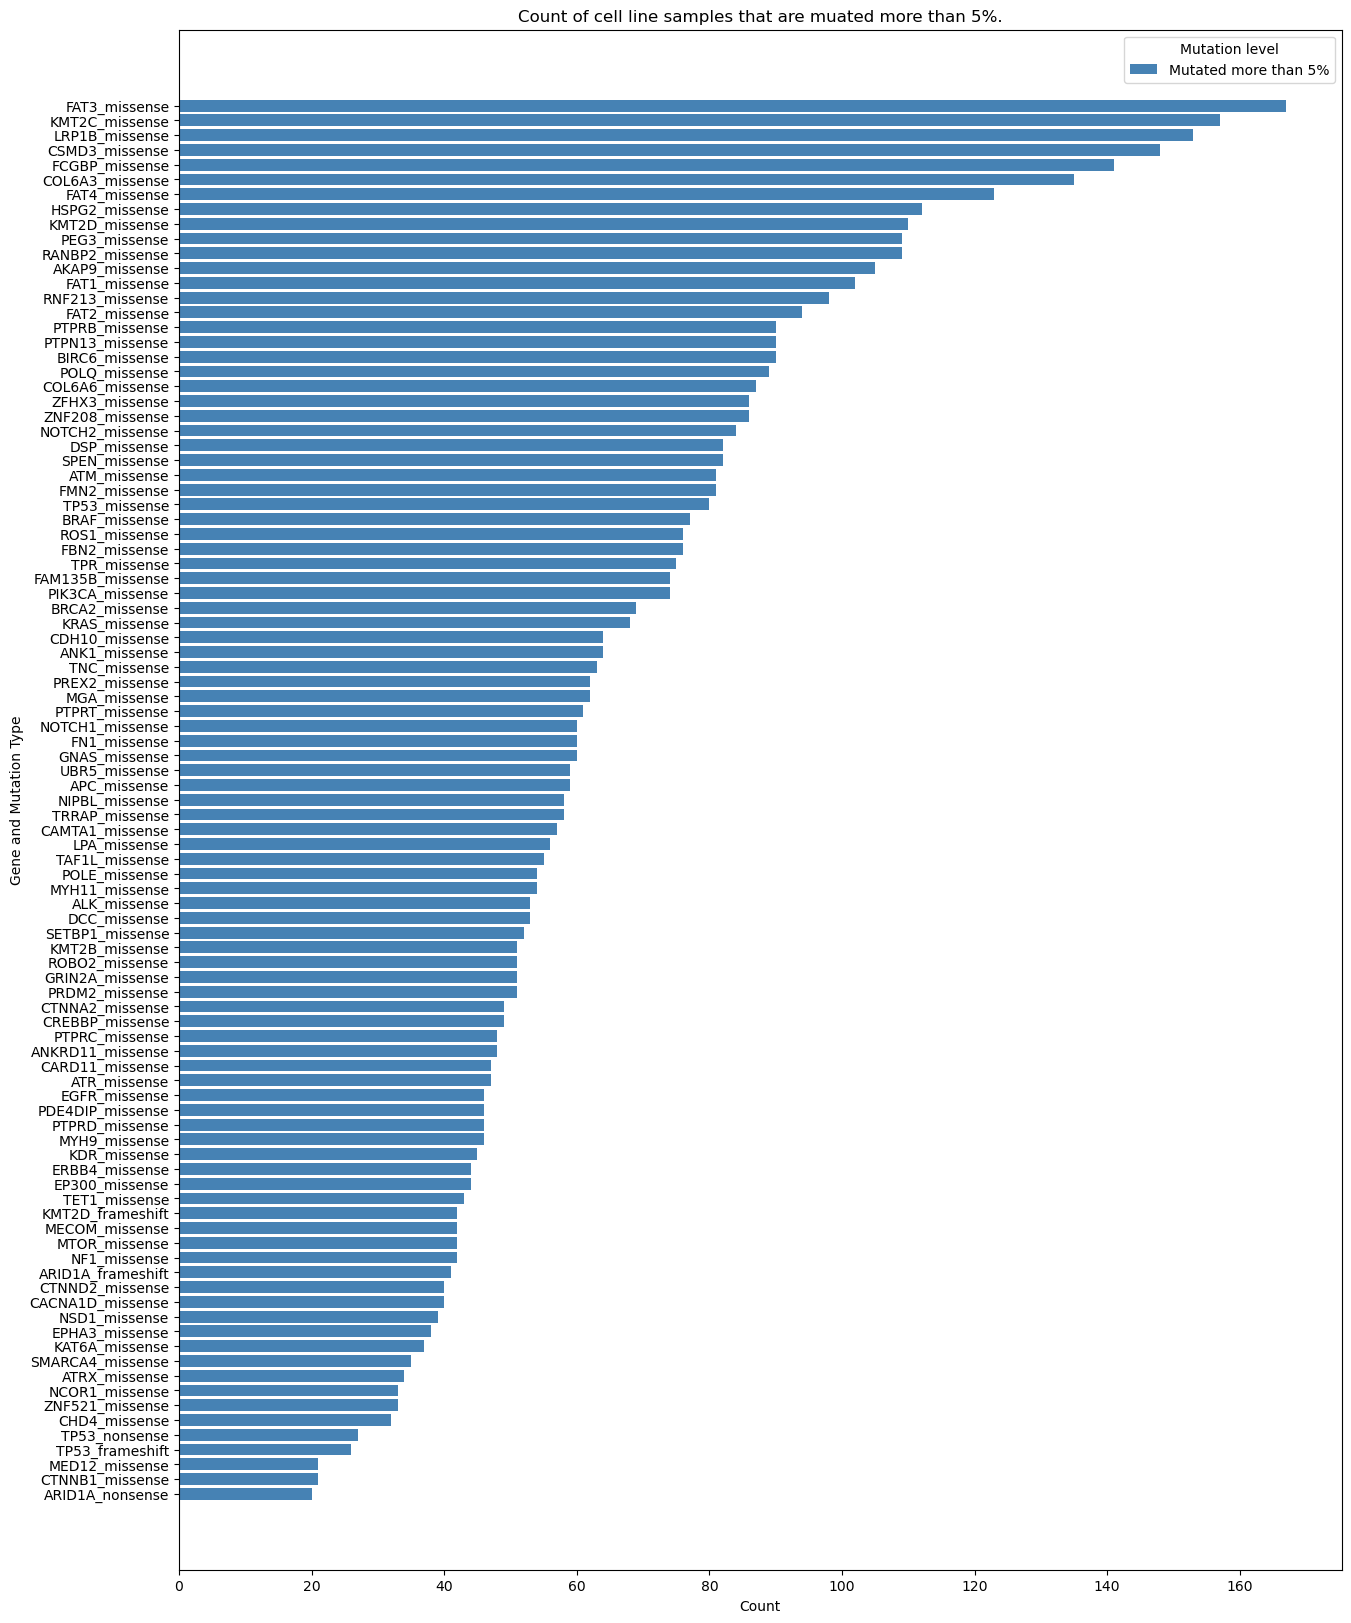

In [21]:
# bar plot for mutated cell lines over 5%
cell_mutated_count =  cell_low + cell_medium + cell_high

cell_mutated_count= pd.DataFrame([mutation_list, cell_mutated_count]).transpose()
cell_mutated_count.columns = ['Gene and Mutation Type','Mutated more than 5%']



plt.figure(figsize=(15, 20))
cell_mutated_bar = cell_mutated_count.sort_values(by= 'Mutated more than 5%', ascending=True) #sort values
plt.barh(cell_mutated_bar['Gene and Mutation Type'], cell_mutated_bar['Mutated more than 5%'], color='steelblue', label = 'Mutated more than 5%' )

plt.xlabel('Count')
plt.ylabel('Gene and Mutation Type')
plt.title('Count of cell line samples that are muated more than 5%.')
plt.legend(title='Mutation level',)
#plt.savefig('final_plots/cell_line_mutated_over_5percent')
plt.show()

In [22]:
#Catagorise mutational level and count
#patient tissue sample(four levels)

#load patient tissue sample data 
tissue = TissueSample('Patient_Mutations.tsv','\t')

tissue_group =tissue.grouping()

#count mutation frequencies

tissue_no= tissue.count_categories('No')
tissue_low = tissue.count_categories('Low')
tissue_medium = tissue.count_categories('Medium')
tissue_high = tissue.count_categories('High')

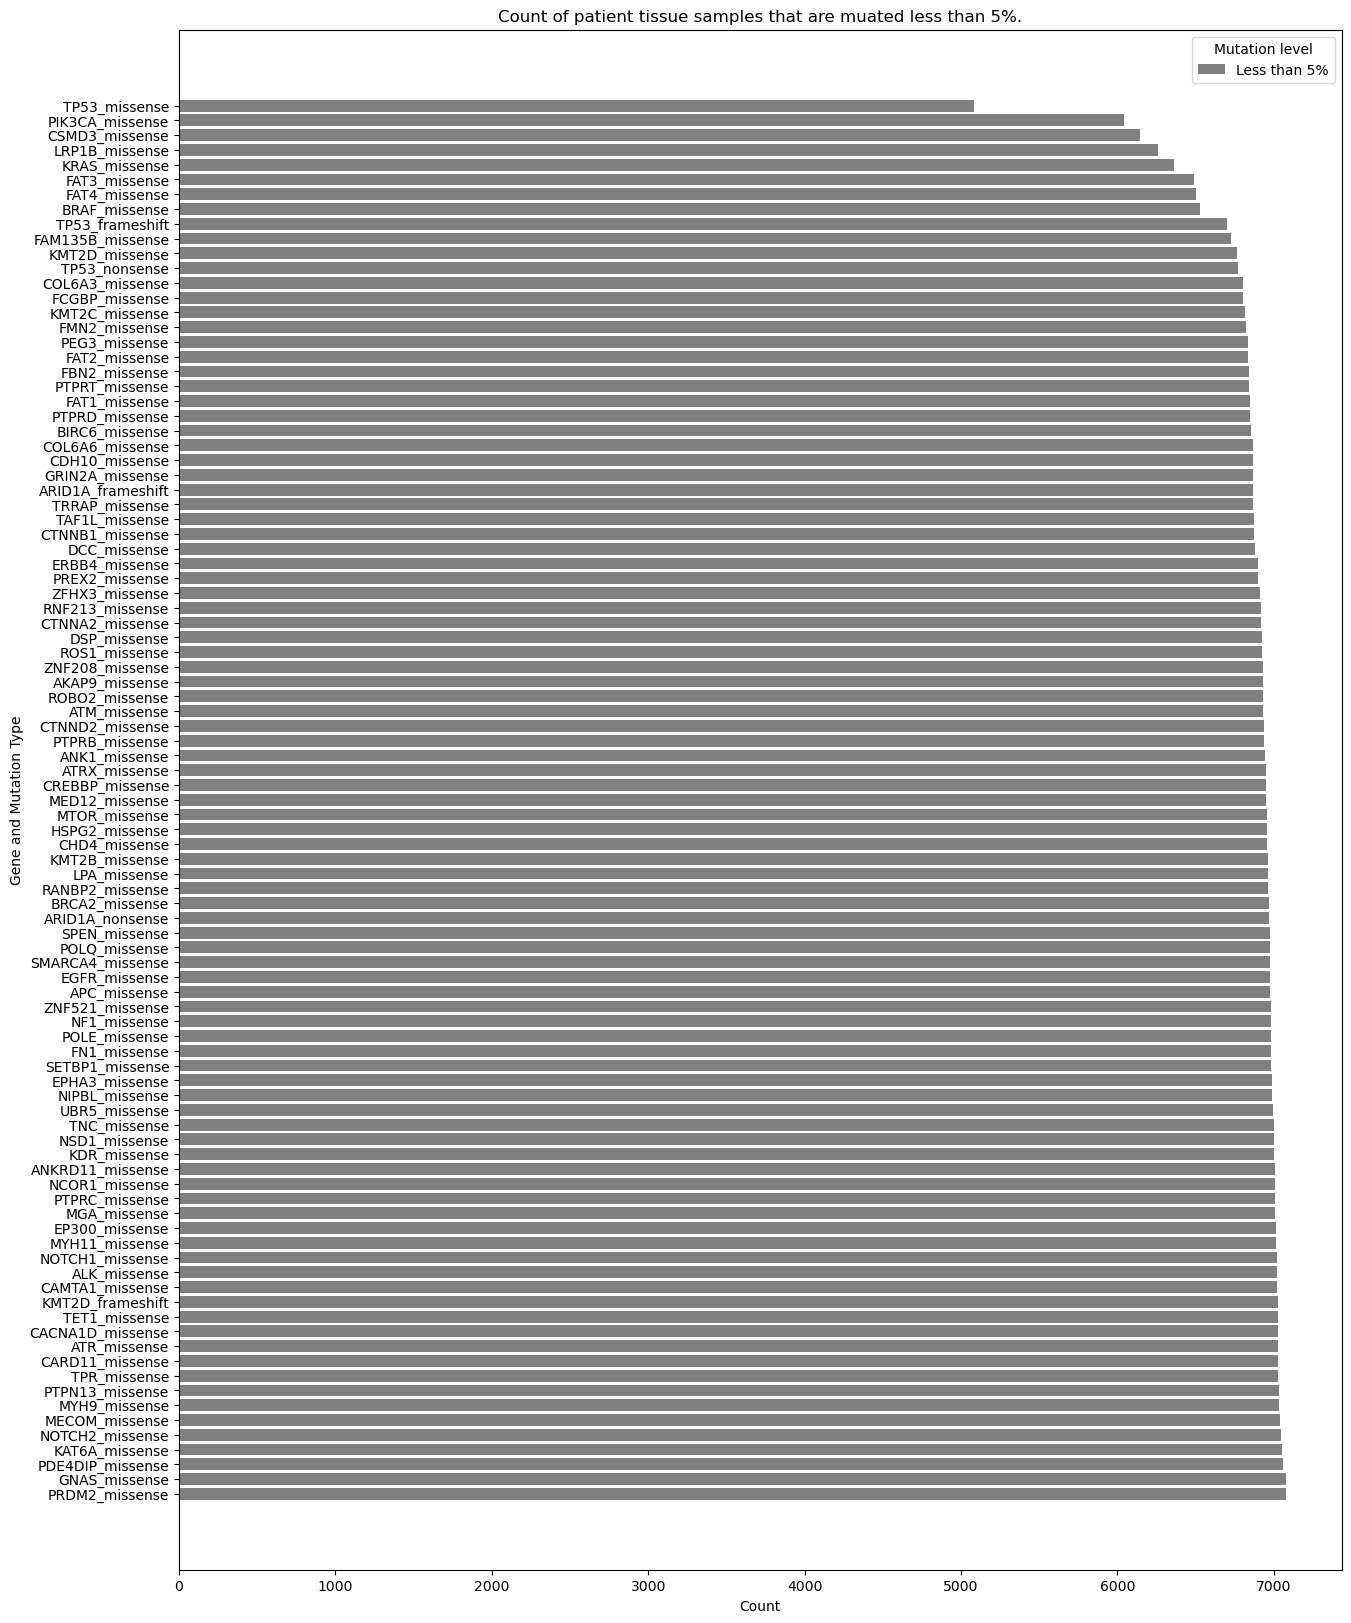

In [23]:
#plot the count of the catagories 
#patient tissue sample (no mutation - less than 5 %)
tissue_count_df = pd.DataFrame([mutation_list, tissue_no]).transpose()
tissue_count_df.columns = ['Gene and Mutation type', 'Less than 5%']


#bar graph
plt.figure(figsize=(15, 20))
wild_mutation_tissue = tissue_count_df.sort_values(by= 'Less than 5%', ascending=False) #sort values
plt.barh(wild_mutation_tissue['Gene and Mutation type'], wild_mutation_tissue['Less than 5%'], color='gray', label = 'Less than 5%' )

plt.xlabel('Count')
plt.ylabel('Gene and Mutation Type')
plt.title('Count of patient tissue samples that are muated less than 5%.')
plt.legend(title='Mutation level',)
#plt.savefig('final_plots/patient_tissue_sample_wild_mutation.png')
plt.show()

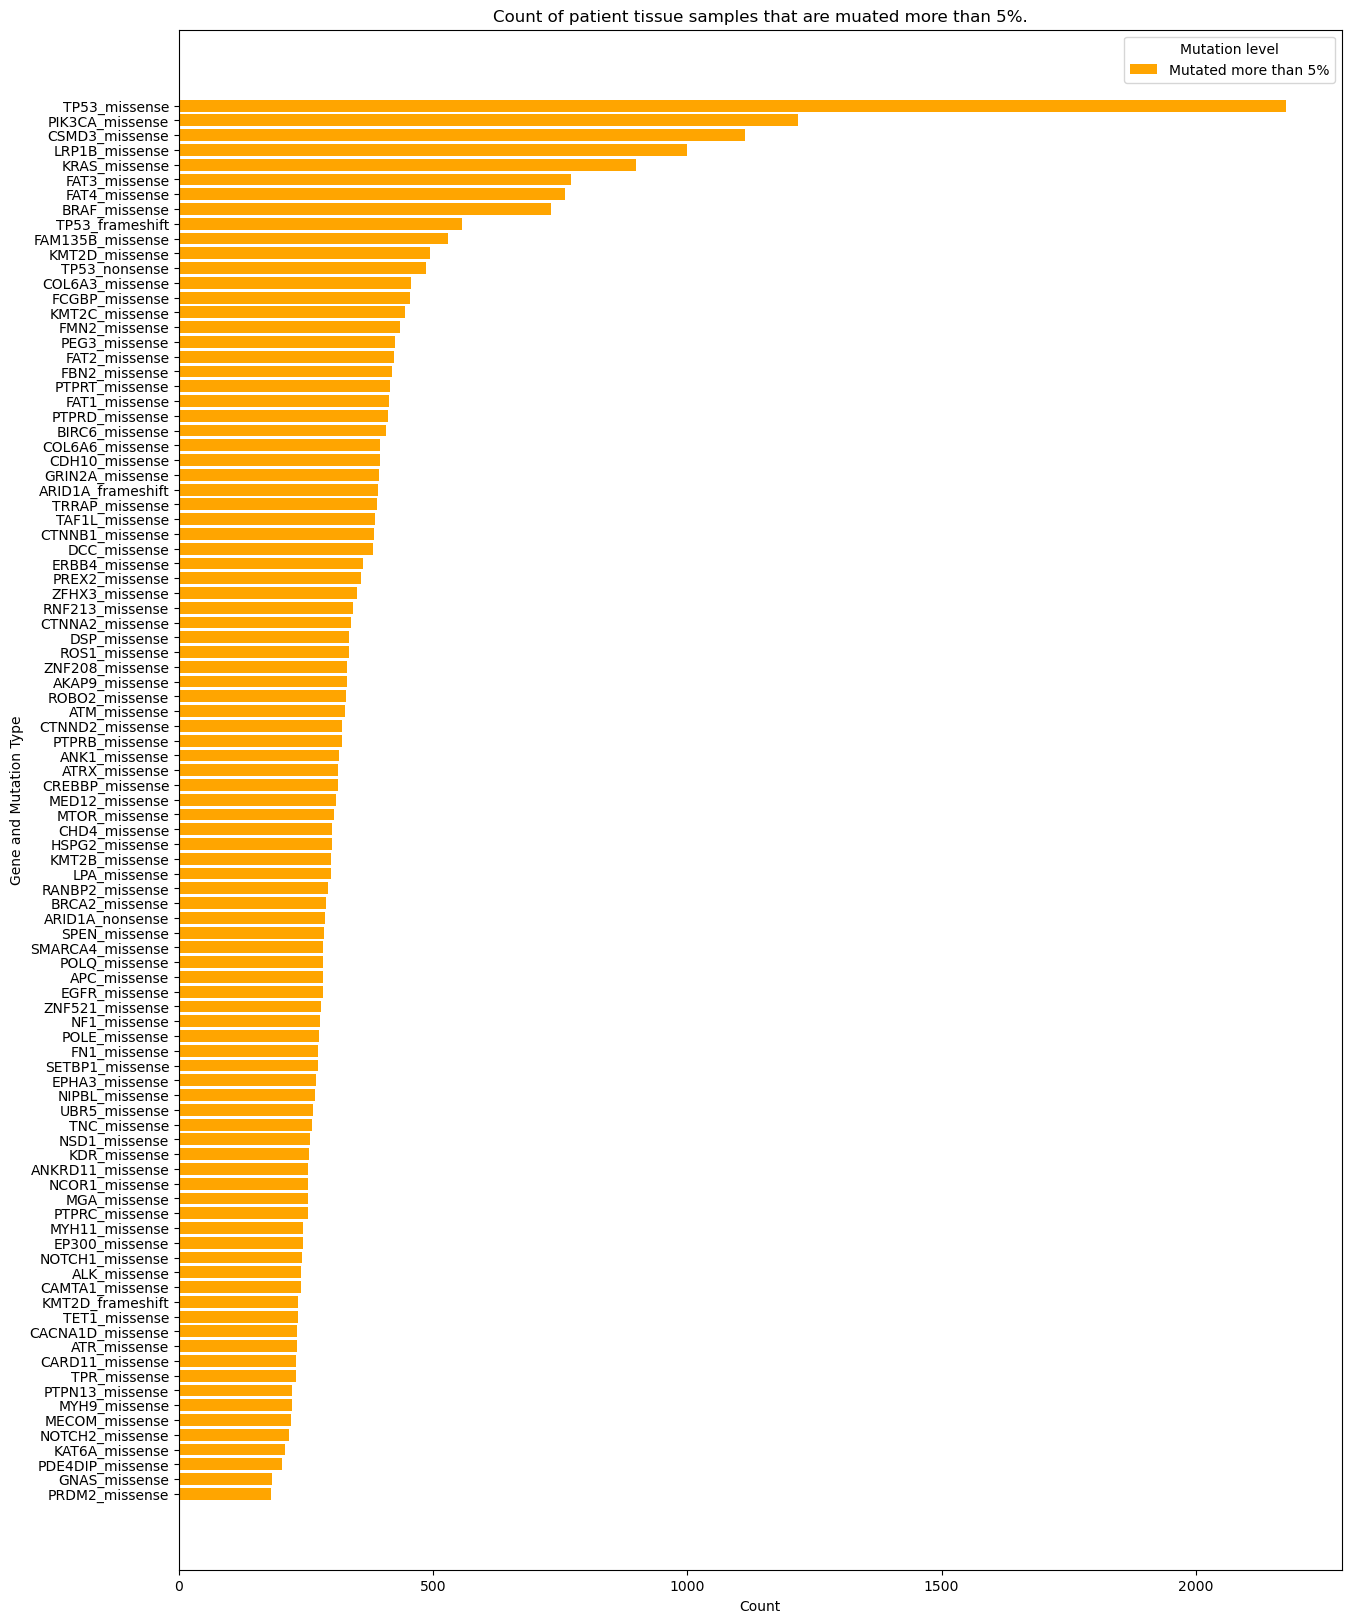

In [24]:
# bar plot for mutated cell lines over 5%
tissue_mutated_count =  tissue_low + tissue_medium + tissue_high

tissue_mutated_count= pd.DataFrame([mutation_list, tissue_mutated_count]).transpose()
tissue_mutated_count.columns = ['Gene and Mutation Type','Mutated more than 5%']



plt.figure(figsize=(15, 20))
tissue_mutated_bar = tissue_mutated_count.sort_values(by= 'Mutated more than 5%', ascending=True) #sort values
plt.barh(tissue_mutated_bar['Gene and Mutation Type'], tissue_mutated_bar['Mutated more than 5%'], color='orange', label = 'Mutated more than 5%' )

plt.xlabel('Count')
plt.ylabel('Gene and Mutation Type')
plt.title('Count of patient tissue samples that are muated more than 5%.')
plt.legend(title='Mutation level',)
#plt.savefig('final_plots/patient_tissue_sample_mutated_over_5percent')
plt.show()

##### 2. Proportion

In [25]:
# cell line genes proportion mutation
cell_length = cell.df_length() #cell line

cell_prop_no = round(cell_no/cell_length*100,2)
cell_prop_low = round(cell_low/cell_length*100, 2)
cell_prop_medium = round(cell_medium/cell_length*100, 2)
cell_prop_high = round(cell_high/cell_length*100,2)

In [26]:
# patient tissue sample proportional mutation 
tissue_length = tissue.df_length() #tissue sample

tissue_prop_no = round(tissue_no/tissue_length*100,2)
tissue_prop_low = round(tissue_low/tissue_length*100, 2)
tissue_prop_medium = round(tissue_medium/tissue_length*100, 2)
tissue_prop_high = round(tissue_high/tissue_length*100,2)

In [27]:
# aggregate the low, medium, high into cell line that have mutated #used for the dashboard
aggregated_cell = cell_prop_low + cell_prop_medium + cell_prop_high
aggregated_tissue = tissue_prop_low + tissue_prop_medium + tissue_prop_high
aggregated_df = pd.DataFrame([mutation_list, aggregated_cell, aggregated_tissue]).transpose()
aggregated_df.columns = ['Gene and Mutation Type', 'Proportion of Cell Line Samples with Mutation >5%', 'Proportion of Patient Tissue Samples with Mutation >5%']
aggregated_df

Gene and Mutation Type Proportion of Cell Line Samples with Mutation >5%  \
0          AKAP9_missense                                             22.02   
1            ALK_missense                                             11.11   
2           ANK1_missense                                             13.42   
3        ANKRD11_missense                                             10.07   
4            APC_missense                                             12.38   
..                    ...                                               ...   
90         TRRAP_missense                                             12.16   
91          UBR5_missense                                             12.37   
92         ZFHX3_missense                                             18.04   
93        ZNF208_missense                                             18.03   
94        ZNF521_missense                                              6.92   

   Proportion of Patient Tissue Samples with Mutation >5%  
0                                                4.54      
1                                                3.31      
2                                                4.34      
3                                                 3.5      
4                                                 3.9      
..                                                ...      
90                                               5.37      
91                                               3.63      
92                                               4.83      
93                                               4.54      
94                                               3.84      

[95 rows x 3 columns]

##### Graph the first 20 most mutated genes

In [28]:
top_20_agg_cell = aggregated_df.sort_values(by='Proportion of Cell Line Samples with Mutation >5%', ascending=False).head(20)
top_20_agg_cell = top_20_agg_cell.sort_values(by='Proportion of Cell Line Samples with Mutation >5%', ascending=False)


top_20_agg_tissue = aggregated_df.sort_values(by='Proportion of Patient Tissue Samples with Mutation >5%', ascending=False).head(20)
top_20_agg_tissue = top_20_agg_tissue.sort_values(by='Proportion of Patient Tissue Samples with Mutation >5%', ascending=False)




In [29]:
top_20_agg_cell

Gene and Mutation Type Proportion of Cell Line Samples with Mutation >5%  \
34          FAT3_missense                                             35.02   
46         KMT2C_missense                                             32.92   
51         LRP1B_missense                                             32.08   
21         CSMD3_missense                                             31.03   
37         FCGBP_missense                                             29.55   
18        COL6A3_missense                                              28.3   
35          FAT4_missense                                             25.78   
42         HSPG2_missense                                             23.48   
48         KMT2D_missense                                             23.06   
76        RANBP2_missense                                             22.86   
65          PEG3_missense                                             22.85   
0          AKAP9_missense                                             22.02   
32          FAT1_missense                                             21.39   
77        RNF213_missense                                             20.54   
33          FAT2_missense                                              19.7   
72         PTPRB_missense                                             18.87   
71        PTPN13_missense                                             18.87   
10         BIRC6_missense                                             18.87   
68          POLQ_missense                                             18.66   
19        COL6A6_missense                                             18.24   

   Proportion of Patient Tissue Samples with Mutation >5%  
34                                              10.64      
46                                               6.13      
51                                              13.76      
21                                              15.33      
37                                               6.25      
18                                                6.3      
35                                              10.45      
42                                               4.13      
48                                                6.8      
76                                               4.05      
65                                               5.84      
0                                                4.54      
32                                                5.7      
77                                               4.73      
33                                               5.83      
72                                               4.42      
71                                               3.07      
10                                               5.62      
68                                               3.91      
19                                               5.45

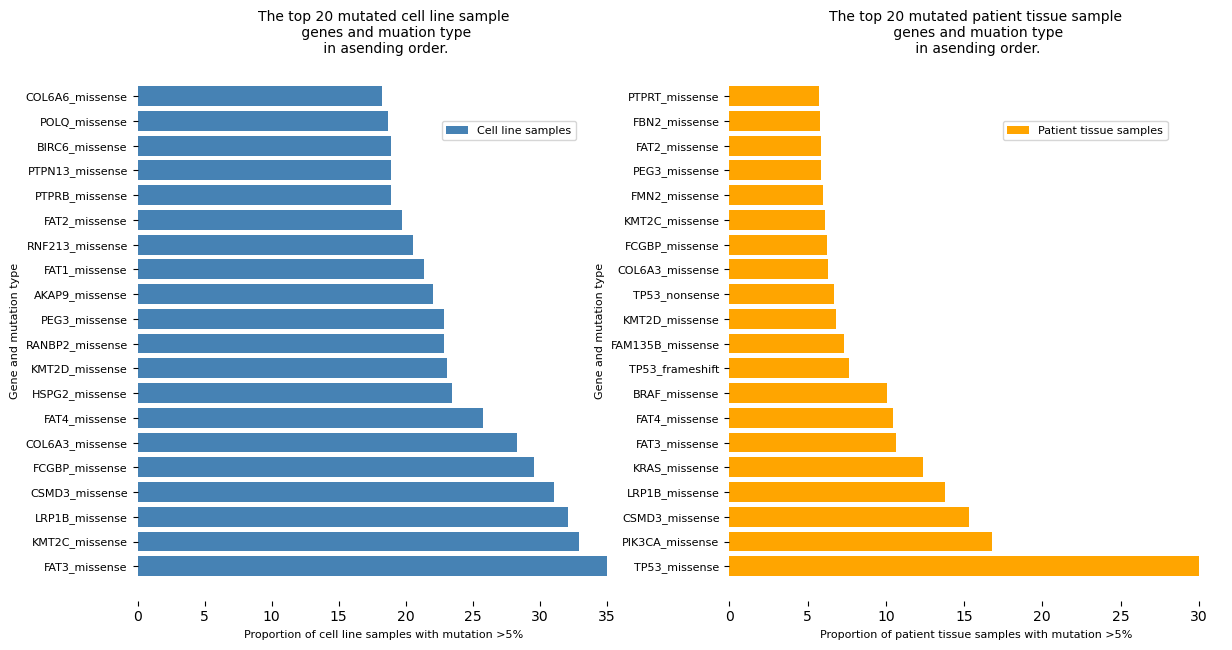

In [30]:
#plot the top 20 cell lines that are mutated

#bar plot 
fig, axs = plt.subplots(1,2,figsize=(14,7))

#subplot 1 data
x1= top_20_agg_cell['Gene and Mutation Type']
y1= top_20_agg_cell['Proportion of Cell Line Samples with Mutation >5%']

#subplot 2 data
x2=top_20_agg_tissue['Gene and Mutation Type']
y2 = top_20_agg_tissue['Proportion of Patient Tissue Samples with Mutation >5%']


#subplot 1
axs[0].barh(x1,y1, label='Cell line samples', color='steelblue')
axs[0].set_title('The top 20 mutated cell line sample\n genes and muation type\n in asending order.', fontsize=10)
axs[0].set_xlabel('Proportion of cell line samples with mutation >5%',fontsize=(8))
axs[0].set_ylabel('Gene and mutation type', fontsize=(8))
axs[0].legend(loc='upper right', bbox_to_anchor=(0.90,0.90),fontsize=8)



#subplot 2
axs[1].barh(x2,y2, label='Patient tissue samples', color='orange')
axs[1].set_title('The top 20 mutated patient tissue sample\n genes and muation type\n in asending order.', fontsize=10)
axs[1].set_xlabel('Proportion of patient tissue samples with mutation >5%',fontsize=(8) )
axs[1].set_ylabel('Gene and mutation type', fontsize=(8))
axs[1].legend(loc='upper right', bbox_to_anchor=(0.90,0.90),fontsize=8)

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
for ax in axs:
    ax.tick_params(axis='y', labelsize=8)
#plt.savefig('final_plots/top_20_mutated')
plt.show()

The following two datasets combine the mutation levels for cell line and patient samples into individual data frames that will be used for the dashboard.

In [31]:
#cell line
cell_pro_df = pd.DataFrame([cell_prop_no,cell_prop_low,cell_prop_medium,cell_prop_high])
cell_pro_df.columns = mutation_list
cell_pro_df.index= mut_level
cell_pro_df

AKAP9_missense  ALK_missense  ANK1_missense  ANKRD11_missense  \
No               77.99         88.89          86.58             89.94   
Low               0.84          0.63           0.21              0.42   
Medium           19.08          9.43          11.32              8.81   
High              2.10          1.05           1.89              0.84   

        APC_missense  ARID1A_frameshift  ARID1A_nonsense  ATM_missense  \
No             87.63              91.40            95.81         83.02   
Low             1.26               1.47             0.00          0.21   
Medium          8.39               6.29             3.14         14.68   
High            2.73               0.84             1.05          2.10   

        ATRX_missense  ATR_missense  ...  TNC_missense  TP53_frameshift  \
No              92.87         90.15  ...         86.79            94.55   
Low              0.63          0.84  ...          0.21             0.42   
Medium           5.03          8.60  ...         10.48             2.52   
High             1.47          0.42  ...          2.52             2.52   

        TP53_missense  TP53_nonsense  TPR_missense  TRRAP_missense  \
No              83.23          94.34         84.28           87.84   
Low              0.21           0.00          0.63            0.84   
Medium           7.97           2.94         12.79            9.85   
High             8.60           2.73          2.31            1.47   

        UBR5_missense  ZFHX3_missense  ZNF208_missense  ZNF521_missense  
No              87.63           81.97            81.97            93.08  
Low              1.26            0.63             1.89             0.63  
Medium           9.64           14.68            12.37             6.08  
High             1.47            2.73             3.77             0.21  

[4 rows x 95 columns]

In [32]:
# tissue sample

tissue_pro_df = pd.DataFrame([tissue_prop_no, tissue_prop_low, tissue_prop_medium, tissue_prop_high])
tissue_pro_df.columns = mutation_list
tissue_pro_df.index = mut_level
tissue_pro_df

AKAP9_missense  ALK_missense  ANK1_missense  ANKRD11_missense  \
No               95.45         96.69          95.66             96.50   
Low               0.88          0.54           0.73              0.52   
Medium            3.62          2.71           3.50              2.81   
High              0.04          0.06           0.11              0.17   

        APC_missense  ARID1A_frameshift  ARID1A_nonsense  ATM_missense  \
No             96.10              94.61            96.03         95.51   
Low             0.68               0.54             0.48          0.62   
Medium          3.10               4.70             3.32          3.71   
High            0.12               0.15             0.17          0.17   

        ATRX_missense  ATR_missense  ...  TNC_missense  TP53_frameshift  \
No              95.70         96.80  ...         96.40            92.34   
Low              0.59          0.61  ...          0.45             0.47   
Medium           3.14          2.56  ...          2.96             6.17   
High             0.56          0.03  ...          0.18             1.02   

        TP53_missense  TP53_nonsense  TPR_missense  TRRAP_missense  \
No              70.00          93.32         96.83           94.63   
Low              1.63           0.50          0.72            0.91   
Medium          19.23           4.50          2.44            4.34   
High             9.15           1.68          0.01            0.12   

        UBR5_missense  ZFHX3_missense  ZNF208_missense  ZNF521_missense  
No              96.36           95.18            95.45            96.16  
Low              0.84            0.80             0.81             0.65  
Medium           2.64            3.86             3.65             3.11  
High             0.15            0.17             0.08             0.08  

[4 rows x 95 columns]

Next, the proportions of the cell lines and patient tissue samples will be calculated based on the cancer type and gene mutation type. 

In [33]:
from ordered_set import OrderedSet

In [34]:
#unique cancer types
cell_cancer_uniq = list(OrderedSet(cell_cancer_type))
tissue_cancer_uniq = list(OrderedSet(tissue_cancer_type))

In [35]:
#cell object
cell_type = CellLine('CellLine_Mutations.tsv','\t')
cell_type.grouping()
cell_type.rename_column(mutation_list)
cell_type.add_column('cancer_type', cell_cancer_type).head(5)

AKAP9_missense ALK_missense ANK1_missense ANKRD11_missense APC_missense  \
0             No           No            No               No           No   
1             No           No        Medium               No           No   
2             No       Medium            No               No           No   
3             No           No            No               No           No   
4             No           No            No               No         High   

  ARID1A_frameshift ARID1A_nonsense ATM_missense ATRX_missense ATR_missense  \
0                No              No           No        Medium           No   
1                No              No           No            No       Medium   
2                No              No           No            No           No   
3                No          Medium           No            No           No   
4                No              No           No            No           No   

   ... TP53_frameshift TP53_missense TP53_nonsense TPR_missense  \
0  ...              No            No            No           No   
1  ...              No            No            No           No   
2  ...              No            No            No           No   
3  ...              No            No            No           No   
4  ...              No            No            No           No   

  TRRAP_missense UBR5_missense ZFHX3_missense ZNF208_missense ZNF521_missense  \
0         Medium            No             No              No              No   
1             No            No         Medium              No              No   
2             No            No             No              No              No   
3             No            No         Medium             Low              No   
4             No            No             No              No              No   

  cancer_type  
0   Esophagus  
1     Thyroid  
2       Liver  
3       Ovary  
4        Skin  

[5 rows x 96 columns]

In [36]:
#tissue object
tissue_type = TissueSample('Patient_Mutations.tsv','\t')
tissue_type.grouping()
tissue_type.rename_column(mutation_list)
tissue_type.add_column('cancer_type', tissue_cancer_type).head(5)

AKAP9_missense ALK_missense ANK1_missense ANKRD11_missense APC_missense  \
0             No           No            No               No           No   
1             No           No            No               No           No   
2             No           No            No               No           No   
3             No           No            No               No           No   
4             No           No            No               No           No   

  ARID1A_frameshift ARID1A_nonsense ATM_missense ATRX_missense ATR_missense  \
0                No              No           No            No           No   
1                No              No           No            No           No   
2                No              No           No            No           No   
3                No              No           No            No           No   
4                No              No           No            No           No   

   ... TP53_frameshift TP53_missense TP53_nonsense TPR_missense  \
0  ...              No            No            No           No   
1  ...              No          High            No           No   
2  ...              No            No            No           No   
3  ...              No        Medium            No           No   
4  ...              No        Medium            No           No   

  TRRAP_missense UBR5_missense ZFHX3_missense ZNF208_missense ZNF521_missense  \
0         Medium            No             No              No              No   
1             No            No             No              No              No   
2             No            No             No              No              No   
3             No            No             No              No              No   
4             No            No             No              No              No   

  cancer_type  
0     Stomach  
1       Ovary  
2        Skin  
3    Pancreas  
4       Ovary  

[5 rows x 96 columns]

The two datasets are then grouped by their cancer type and saved in a list 

In [37]:
#cell line sample
cell_type_grouped = cell_type.group_by_cancer_type(cell_cancer_uniq,'cancer_type')

In [38]:
#patient tissue sample
tissue_type_grouped = tissue_type.group_by_cancer_type(tissue_cancer_uniq, 'cancer_type')

A dataframe is created for each cancer type, and the data sets are collected in a list in order. The count data frames will be used for the chi-square independence test, while the proportion datagrams will be used in the dashboard to compare the two samples' percentage changes. 

In [39]:
# df for each cell line cancer type

esophagus_cell = cell_type_grouped[0]
thyroid_cell = cell_type_grouped[1]
liver_cell = cell_type_grouped[2]
ovary_cell = cell_type_grouped[3] #compare it with tissue sample
skin_cell = cell_type_grouped[4]
c_nervous_s_cell = cell_type_grouped[5]
kidney_cell = cell_type_grouped[6]
breast_cell = cell_type_grouped[7]
lung_cell = cell_type_grouped[8]
intestine_cell = cell_type_grouped[9]
pancreas_cell = cell_type_grouped[10]
endometrium_cell = cell_type_grouped[11]
cervix_cell = cell_type_grouped[12]
stomach_cell = cell_type_grouped[13]
bladder_cell = cell_type_grouped[14]

#ordered list
cell_df_list = [esophagus_cell, thyroid_cell, liver_cell, ovary_cell, skin_cell,
                c_nervous_s_cell, kidney_cell, breast_cell, lung_cell, intestine_cell, 
                pancreas_cell, endometrium_cell, cervix_cell, stomach_cell, bladder_cell]

In [40]:
ovary_cell.shape

(34, 96)

In [41]:
# df for each tissue cancer type

stomach_tissue = tissue_type_grouped[0]
ovary_tissue = tissue_type_grouped[1] #compare it with cell line proportion
skin_tissue = tissue_type_grouped[2]
pancreas_tissue = tissue_type_grouped[3]
kidney_tissue = tissue_type_grouped[4] #compare it with cell line proportion
intestine_tissue = tissue_type_grouped[5]
c_nervous_s_tissue = tissue_type_grouped[6]
bladder_tissue = tissue_type_grouped[7]
lung_tissue = tissue_type_grouped[8]
cervix_tissue = tissue_type_grouped[9]
endometrium_tissue = tissue_type_grouped[10]
breast_tissue = tissue_type_grouped[11]
esophagus_tissue = tissue_type_grouped[12]
liver_tissue = tissue_type_grouped[13]
thyroid_tissue = tissue_type_grouped[14]

tissue_df_list = [esophagus_tissue, thyroid_tissue, liver_tissue, ovary_tissue, 
                  skin_tissue, c_nervous_s_tissue, kidney_tissue, breast_tissue, 
                  lung_tissue, intestine_tissue, pancreas_tissue, endometrium_tissue, 
                  cervix_tissue, stomach_tissue, bladder_tissue]

In [42]:
def each_cancer_types(df): # proportion for each cancer type

    df = df.drop('cancer_type', axis=1)
    no = round(df[df == 'No'].count()/len(df)*100,2)
    low = round(df[df == 'Low'].count()/len(df)*100,2)
    med = round(df[df == 'Medium'].count()/len(df)*100,2)
    high = round(df[df == 'High'].count()/len(df)*100,2)
    df=pd.DataFrame([no,low, med, high ])

    df.index = ['<5%', '5-15%', '16-65%', 'Above 65%'] # type: ignore

    return df  

In [43]:
#proportion cell line 

esophagus_cell_prop = each_cancer_types(esophagus_cell)

thyroid_cell_prop = each_cancer_types(thyroid_cell)

liver_cell_prop = each_cancer_types(liver_cell)

ovary_cell_prop = each_cancer_types(ovary_cell) 

skin_cell_prop = each_cancer_types(skin_cell)

c_nervous_s_cell_prop = each_cancer_types(c_nervous_s_cell)

kidney_cell_prop = each_cancer_types(kidney_cell)

breast_cell_prop = each_cancer_types(breast_cell)

lung_cell_prop = each_cancer_types(lung_cell)

intestine_cell_prop = each_cancer_types(intestine_cell)

pancreas_cell_prop = each_cancer_types(pancreas_cell)

endometrium_cell_prop = each_cancer_types(endometrium_cell)

cervix_cell_prop = each_cancer_types(cervix_cell)

stomach_cell_prop = each_cancer_types(stomach_cell)

bladder_cell_prop = each_cancer_types(bladder_cell)

In [44]:
esophagus_tissue_prop = each_cancer_types(esophagus_tissue)

thyroid_tissue_prop = each_cancer_types(thyroid_tissue)

liver_tissue_prop = each_cancer_types(liver_tissue)

ovary_tissue_prop = each_cancer_types(ovary_tissue) 

skin_tissue_prop = each_cancer_types(skin_tissue)

c_nervous_s_tissue_prop = each_cancer_types(c_nervous_s_tissue)

kidney_tissue_prop = each_cancer_types(kidney_tissue)

breast_tissue_prop = each_cancer_types(breast_tissue)

lung_tissue_prop = each_cancer_types(lung_tissue)

intestine_tissue_prop = each_cancer_types(intestine_tissue)

pancreas_tissue_prop = each_cancer_types(pancreas_tissue)

endometrium_tissue_prop = each_cancer_types(endometrium_tissue)

cervix_tissue_prop = each_cancer_types(cervix_tissue)

stomach_tissue_prop = each_cancer_types(stomach_tissue)

bladder_tissue_prop = each_cancer_types(bladder_tissue)

In [45]:
#proportion distribution plot(cell line)

#load cell_line data
stats_cell = CellLine('CellLine_Mutations.tsv', sep='\t')

stats_cell = stats_cell.convert_binary()

stats_cell =pd.DataFrame(stats_cell, columns=mutation_list)

stats_cell.insert(0, 'Cancer Type', cell_cancer_type)

stats_cell_all = stats_cell.groupby('Cancer Type').count() # to find the number of samples in under each cancer type sample

stats_cell_mutated = stats_cell.groupby('Cancer Type').sum() # total samples that are mutated over 5%

cell_mutated_percent = round(stats_cell_mutated/stats_cell_all*100, 2)


#percentage density heatmap #cell line
stat = cell_mutated_percent
stat['Cancer type']  = cell_mutated_percent.index

# Melt the df
data_melted = stat.melt(id_vars='Cancer type', var_name='Gene and mutation', value_name='Mutation percentage')

# Create a density plot
fig= px.density_heatmap(data_melted, x='Gene and mutation', y='Cancer type', z= 'Mutation percentage', 
                         histfunc="sum", color_continuous_scale="Viridis")

fig.update_layout(
    title='Frequency plot for cell line<br>samples that are mutated more than 5%.', title_x=0.3,
    yaxis_title='Cancer Type',
    xaxis_title='Gene and muatation',
    height=800, width=1400)


fig.update_yaxes(tickfont=dict(size=8))
fig.update_xaxes(tickfont=dict(size=8))
#fig.write_image('final_plots/prop_dist_cell.png')

fig.show() 

In [46]:
stats_cell.loc[stats_cell['Cancer Type'] == 'Ovary']

Cancer Type  AKAP9_missense  ALK_missense  ANK1_missense  \
3         Ovary             0.0           0.0            0.0   
10        Ovary             0.0           0.0            0.0   
11        Ovary             0.0           0.0            0.0   
15        Ovary             0.0           0.0            0.0   
42        Ovary             0.0           0.0            0.0   
49        Ovary             1.0           0.0            1.0   
53        Ovary             1.0           0.0            0.0   
58        Ovary             1.0           0.0            0.0   
78        Ovary             0.0           0.0            0.0   
79        Ovary             0.0           0.0            0.0   
84        Ovary             0.0           1.0            0.0   
103       Ovary             0.0           0.0            0.0   
122       Ovary             0.0           1.0            0.0   
127       Ovary             1.0           1.0            0.0   
128       Ovary             0.0           0.0            0.0   
130       Ovary             0.0           0.0            0.0   
131       Ovary             0.0           0.0            0.0   
132       Ovary             1.0           1.0            0.0   
133       Ovary             0.0           0.0            0.0   
137       Ovary             0.0           0.0            0.0   
176       Ovary             0.0           0.0            0.0   
180       Ovary             1.0           0.0            0.0   
303       Ovary             0.0           0.0            0.0   
321       Ovary             0.0           0.0            0.0   
343       Ovary             0.0           0.0            0.0   
369       Ovary             1.0           0.0            0.0   
370       Ovary             1.0           0.0            1.0   
371       Ovary             0.0           0.0            0.0   
399       Ovary             0.0           0.0            0.0   
403       Ovary             1.0           1.0            0.0   
404       Ovary             0.0           0.0            0.0   
442       Ovary             0.0           0.0            0.0   
457       Ovary             0.0           0.0            1.0   
458       Ovary             0.0           0.0            0.0   

     ANKRD11_missense  APC_missense  ARID1A_frameshift  ARID1A_nonsense  \
3                 0.0           0.0                0.0              1.0   
10                0.0           1.0                0.0              0.0   
11                0.0           0.0                0.0              0.0   
15                0.0           0.0                0.0              0.0   
42                0.0           0.0                1.0              0.0   
49                0.0           0.0                1.0              1.0   
53                1.0           0.0                1.0              1.0   
58                1.0           0.0                1.0              0.0   
78                0.0           0.0                0.0              0.0   
79                0.0           0.0                0.0              0.0   
84                0.0           0.0                0.0              0.0   
103               1.0           0.0                0.0              0.0   
122               1.0           0.0                1.0              0.0   
127               0.0           0.0                1.0              0.0   
128               0.0           0.0                0.0              0.0   
130               0.0           0.0                0.0              0.0   
131               0.0           0.0                0.0              0.0   
132               0.0           0.0                1.0              0.0   
133               0.0           0.0                0.0              0.0   
137               0.0           0.0                0.0              0.0   
176               0.0           0.0                0.0              0.0   
180               0.0           1.0                1.0              0.0   
303               1.0           0.0   

In [47]:
#proportion distribution plot (tissue samples)

stats_tissue = TissueSample('Patient_Mutations.tsv', sep='\t')
stats_tissue = stats_tissue.convert_binary()
stats_tissue =pd.DataFrame(stats_tissue, columns=mutation_list)
stats_tissue.insert(0, 'Cancer Type', tissue_cancer_type)

stat_tissue_all = stats_tissue.groupby('Cancer Type').count()

stats_tissue_mutated = round(stats_tissue.groupby('Cancer Type').sum()/stat_tissue_all*100,2)




#percentage density heatmap #tissue sample
stat = stats_tissue_mutated
stat['Cancer type']  = stats_tissue_mutated.index

# Melt the df
data_melted = stat.melt(id_vars='Cancer type', var_name='Gene and mutation', value_name='Mutation percentage')

# Create a density plot
fig_tissue = px.density_heatmap(data_melted, x='Gene and mutation', y='Cancer type', z='Mutation percentage', 
                         histfunc="sum", color_continuous_scale="Viridis")

fig_tissue.update_layout(
    title='Pecentage plot for patient tissue<br>samples that are mutated more than 5%.', title_x=0.3,
    yaxis_title='Cancer Type',
    xaxis_title='Gene and muatation',
    height=800, width=1400
)

fig_tissue.update_yaxes(tickfont=dict(size=8))
fig_tissue.update_xaxes(tickfont=dict(size=8))
#fig_tissue.write_image('final_plots/prop_dist_tissue.png')
fig_tissue.show()

### Statstical Test
#### Chi-square test of independance

Test whether the mutational frequency distribution for cell line and patient samples are statstically dependent. 

Hypothesis

$H_0$ The mutational frequencies in cancer cell-line and tissue samples are independent. 

$H_1$ There is a dependency between mutation frequencies in cancer cell-line and tissue samples.

> $\alpha$ = 0.05  

> $X^2 = \sum\frac{(O_i- E_i)^2}{E_i}$

> $X^2$ = Chi square

> $O_i$ = observed value

> $E_i$ = expected value


In [48]:
from scipy.stats import chi2_contingency, chisquare

In [49]:
#sum of the observed cell muations for the independence test

cell_chi_ind = ChiSquareIndependence(cell_no, cell_low, cell_medium, cell_high)
cell_chi_ind_level = cell_chi_ind.get_mutation_level()
cell_chi_ind.rename_column(mut_level)

cell_chi_ind.add_column('mutation_type', mutation_list).head(5)

No  Low  Medium  High     mutation_type
0  372    4      91    10    AKAP9_missense
1  424    3      45     5      ALK_missense
2  413    1      54     9     ANK1_missense
3  429    2      42     4  ANKRD11_missense
4  418    6      40    13      APC_missense

In [50]:
# sum of the observed tissue mutations for the independence test

tissue_chi_ind = ChiSquareIndependence(tissue_no, tissue_low, tissue_medium, tissue_high)
tissue_chi_ind_level = tissue_chi_ind.get_mutation_level()
tissue_chi_ind.rename_column(mut_level)

tissue_chi_ind.add_column('mutation_type', mutation_list).head(5)

No  Low  Medium  High     mutation_type
0  6929   64     263     3    AKAP9_missense
1  7019   39     197     4      ALK_missense
2  6944   53     254     8     ANK1_missense
3  7005   38     204    12  ANKRD11_missense
4  6976   49     225     9      APC_missense

In [51]:
# total observed values

cell_observed = cell_chi_ind.observed_values_df()
cell_observed.rename(columns={0: 'cell_obs'}, inplace=True)
tissue_observed = tissue_chi_ind.observed_values_df()

total_observed = pd.concat([cell_observed, tissue_observed], axis=1)

In [52]:
total_observed.rename(columns={0: 'tissue_obs'}, inplace=True)
total_observed.index=mut_level
total_observed

cell_obs  tissue_obs
No         38994      653405
Low          347        5546
Medium      5002       28762
High         972        1892

Test for independence

In [53]:
#find the chi2, p-value, degree of freedom and expected values

chi2, p_value, dof, expected = chi2_contingency(total_observed)
expected = expected.round(2)

In [54]:
# add the expected mutation in the total observed df for comparsion 
total_observed.insert(2, 'cell_line_expected',(expected[:,:-1]))
total_observed.insert(3, 'tissue_expected',(expected[:,1:]))

# rearange the columns
total_observed = total_observed[['cell_obs', 'cell_line_expected', 'tissue_obs', 'tissue_expected']]
total_observed

cell_obs  cell_line_expected  tissue_obs  tissue_expected
No         38994            42693.16      653405        649705.84
Low          347              363.36        5546          5529.64
Medium      5002             2081.88       28762         31682.12
High         972              176.59        1892          2687.41

In [55]:
def p_value_alpha(p_value, mutation_level):
    alpha = 0.05
    #print(f'Chi-square: {chi2}')
    
    print(f'P-value: {p_value}')
    print(f'Comparing the p_value with alpha of 0.05 {mutation_level} it can be concluded that,')
    if p_value < alpha:
        print("there is a dependency between mutation frequencies in cancer cell line and tissue sample. ")
    else:
        print("the mutational frequencies are independent. ")
    print('==========')    
p_value_alpha(p_value, 'as a whole')    # because the p value is less than aplha we reject the H0 and accept H1

P-value: 0.0
Comparing the p_value with alpha of 0.05 as a whole it can be concluded that,
there is a dependency between mutation frequencies in cancer cell line and tissue sample. 


Test for independence at each mutation level

In [56]:
cont_no = (cell_chi_ind.get_df()['No'], tissue_chi_ind.get_df()['No'])

cont_low = (cell_chi_ind.get_df()['Low'], tissue_chi_ind.get_df()['Low'])

cont_med = (cell_chi_ind.get_df()['Medium'], tissue_chi_ind.get_df()['Medium'])

cont_high = (cell_chi_ind.get_df()['High'], tissue_chi_ind.get_df()['High'])

#test
chi2_no, p_value_no, dof_no, expected_no = chi2_contingency(cont_no)

chi2_low, p_value_low, dof_low, expected_low = chi2_contingency(cont_low)

chi2_med, p_value_med, dof_med, expected_med = chi2_contingency(cont_med)

chi2_high, p_value_high, dof_high, expected_high = chi2_contingency(cont_high)

In [57]:
p_value_alpha(p_value_no, 'for mutation level "NO",')
print('==========')
p_value_alpha(p_value_low, 'for mutation level "Low",')
print('==========')
p_value_alpha(p_value_med, 'for mutation level "Medium",')
print('==========')
p_value_alpha(p_value_high, 'for mutation level "High",')

P-value: 4.866905272416559e-09
Comparing the p_value with alpha of 0.05 for mutation level "NO", it can be concluded that,
there is a dependency between mutation frequencies in cancer cell line and tissue sample. 
P-value: 2.3911227936584533e-09
Comparing the p_value with alpha of 0.05 for mutation level "Low", it can be concluded that,
there is a dependency between mutation frequencies in cancer cell line and tissue sample. 
P-value: 1.301168060384294e-162
Comparing the p_value with alpha of 0.05 for mutation level "Medium", it can be concluded that,
there is a dependency between mutation frequencies in cancer cell line and tissue sample. 
P-value: 3.090907095900222e-104
Comparing the p_value with alpha of 0.05 for mutation level "High", it can be concluded that,
there is a dependency between mutation frequencies in cancer cell line and tissue sample. 


Dataframes for observed and expected mutation at each level

In [58]:
col_name = ['cell_line_expected', 'tissue_expected']

#expected mutations

no_obs_Vs_exp = pd.DataFrame(expected_no).transpose().astype('int').rename(columns={0:'cell_line_expected',1:'tissue_expected'})
low_obs_Vs_exp = pd.DataFrame(expected_low).transpose().astype('int').rename(columns={0:'cell_line_expected',1:'tissue_expected'})
med_obs_Vs_exp = pd.DataFrame(expected_med).transpose().astype('int').rename(columns={0:'cell_line_expected',1:'tissue_expected'})
high_obs_Vs_exp = pd.DataFrame(expected_high).transpose().astype('int').rename(columns={0:'cell_line_expected',1:'tissue_expected'})



In [59]:
# df - mutation level No
no_obs_Vs_exp.insert(0, 'cell_obs', cell_chi_ind.get_df()['No']) 
no_obs_Vs_exp.insert(2, 'tissue_obs', tissue_chi_ind.get_df()['No'])
no_obs_Vs_exp.insert(0, 'mutation_type', mutation_list)
no_obs_Vs_exp.head(5)

mutation_type  cell_obs  cell_line_expected  tissue_obs  tissue_expected
0    AKAP9_missense       372                 411        6929             6889
1      ALK_missense       424                 419        7019             7023
2     ANK1_missense       413                 414        6944             6942
3  ANKRD11_missense       429                 418        7005             7015
4      APC_missense       418                 416        6976             6977

In [60]:
# df - mutation level Low
low_obs_Vs_exp.insert(0, 'cell_obs', cell_chi_ind.get_df()['Low']) 
low_obs_Vs_exp.insert(2, 'tissue_obs', tissue_chi_ind.get_df()['Low'])
low_obs_Vs_exp.head(5)

cell_obs  cell_line_expected  tissue_obs  tissue_expected
0         4                   4          64               63
1         3                   2          39               39
2         1                   3          53               50
3         2                   2          38               37
4         6                   3          49               51

In [61]:
# df - mutation level mid
med_obs_Vs_exp.insert(0, 'cell_obs', cell_chi_ind.get_df()['Medium']) 
med_obs_Vs_exp.insert(2, 'tissue_obs', tissue_chi_ind.get_df()['Medium'])
med_obs_Vs_exp.head(5)

cell_obs  cell_line_expected  tissue_obs  tissue_expected
0        91                  52         263              301
1        45                  35         197              206
2        54                  45         254              262
3        42                  36         204              209
4        40                  39         225              225

In [62]:
# df - mutation level mid
high_obs_Vs_exp.insert(0, 'cell_obs', cell_chi_ind.get_df()['High']) 
high_obs_Vs_exp.insert(2, 'tissue_obs', tissue_chi_ind.get_df()['High'])
high_obs_Vs_exp.head(5)

cell_obs  cell_line_expected  tissue_obs  tissue_expected
0        10                   4           3                8
1         5                   3           4                5
2         9                   5           8               11
3         4                   5          12               10
4        13                   7           9               14

#### Chi-Square test of independence for each gene mutation in the cell line and tissue samples arranged by cancer type.

This test will determine whether there is an association between the mutation profiles of cell lines, patient tissue samples, and cancer type. 
To do that:
1. Get the cancer types list corresponding to the two datasets.
2. Add a tissue-type column to both datasets.
3. Create a data frame for each cancer type for both datasets. 
4. Perform a Chi-Square test for each gene mutation type. 
5. Visualise the result in a heatmap. 

In [63]:
def chi_cancer_types(df):
    
    df = df.drop('cancer_type', axis=1)
    no = df[df == 'No'].count()
    low = df[df == 'Low'].count()
    med = df[df == 'Medium'].count()
    high = df[df == 'High'].count()
    df=pd.DataFrame([no,low, med, high ])
    
    df.index = ['No', 'Low', 'Medium','High']
   
    return df

In [64]:
#count cell line dfs
esophagus_cell_ = chi_cancer_types(esophagus_cell)
thyroid_cell_ = chi_cancer_types(thyroid_cell)
liver_cell_ = chi_cancer_types(liver_cell)
ovary_cell_ = chi_cancer_types(ovary_cell) 
skin_cell_ = chi_cancer_types(skin_cell)
c_nervous_s_cell_ = chi_cancer_types(c_nervous_s_cell)
kidney_cell_ = chi_cancer_types(kidney_cell)
breast_cell_ = chi_cancer_types(breast_cell)
lung_cell_ = chi_cancer_types(lung_cell)
intestine_cell_ = chi_cancer_types(intestine_cell)
pancreas_cell_ = chi_cancer_types(pancreas_cell)
endometrium_cell_ = chi_cancer_types(endometrium_cell)
cervix_cell_ = chi_cancer_types(cervix_cell)
stomach_cell_ = chi_cancer_types(stomach_cell)
bladder_cell_ = chi_cancer_types(bladder_cell)

In [65]:
#count tissue samples 

stomach_tissue_ = chi_cancer_types(stomach_tissue)
ovary_tissue_ = chi_cancer_types(ovary_tissue)
skin_tissue_ = chi_cancer_types(skin_tissue)
pancreas_tissue_ = chi_cancer_types(pancreas_tissue)
kidney_tissue_ = chi_cancer_types(kidney_tissue)
intestine_tissue_ = chi_cancer_types(intestine_tissue)
c_nervous_s_tissue_ = chi_cancer_types(c_nervous_s_tissue)
bladder_tissue_ = chi_cancer_types(bladder_tissue)
lung_tissue_ = chi_cancer_types(lung_tissue)
cervix_tissue_ = chi_cancer_types(cervix_tissue)
endometrium_tissue_ = chi_cancer_types(endometrium_tissue)
breast_tissue_ = chi_cancer_types(breast_tissue)
esophagus_tissue_ = chi_cancer_types(esophagus_tissue)
liver_tissue_ = chi_cancer_types(liver_tissue)
thyroid_tissue_ = chi_cancer_types(thyroid_tissue)

In [66]:
cell_df_chi = [esophagus_cell_, thyroid_cell_, liver_cell_, ovary_cell_,
                skin_cell_, c_nervous_s_cell_, kidney_cell_, breast_cell_, 
                lung_cell_, intestine_cell_, pancreas_cell_, endometrium_cell_,
                cervix_cell_, stomach_cell_, bladder_cell_]



In [67]:
tissue_df_chi = [esophagus_tissue_, thyroid_tissue_, liver_tissue_, 
                  ovary_tissue_, skin_tissue_, c_nervous_s_tissue_, 
                  kidney_tissue_, breast_tissue_, lung_tissue_, intestine_tissue_, 
                  pancreas_tissue_, endometrium_tissue_, cervix_tissue_, stomach_tissue_, 
                  bladder_tissue_]

In [68]:
#chi indpendence test
smooth_expected = 1
chi2_combo =[]
p_value_combo= []
expected_combo = []
total_res = []


for gene in mutation_list:
    ext_pvalue = []
    for cell in cell_df_chi:
        int_pvalue = []
        for tissue in tissue_df_chi:
            contingency=(cell[gene]+smooth_expected, tissue[gene]+smooth_expected)
            chi2, p_value, dof,expected = chi2_contingency(contingency)
            
            int_pvalue.append(p_value)            
        ext_pvalue.append(int_pvalue)
    p_value_combo.append(int_pvalue)
   
    

In [69]:
df_col_list = ['Esophagus', 'Thyroid', 'Liver', 'Ovary', 'Skin',
               'Central Nervous system', 'Kidney', 'Breast', 'Lung',
               'Intestine', 'Pancreas', 'Endometrium', 'Cervix',
               'Stomach', 'Bladder']

In [70]:
#df for the p value
df = pd.DataFrame(p_value_combo)
dfround = df.round(6)
df.index = mutation_list
df.columns = df_col_list

In [71]:
df

Esophagus       Thyroid         Liver         Ovary  \
AKAP9_missense     0.005812  1.316293e-10  6.325409e-08  5.899866e-06   
ALK_missense       0.025768  4.406269e-07  1.093469e-03  3.585035e-04   
ANK1_missense      0.002321  4.406269e-07  1.650467e-04  8.689694e-06   
ANKRD11_missense   0.025768  1.934421e-06  6.934581e-04  1.001409e-06   
APC_missense       0.000033  4.170557e-12  9.119152e-08  6.560491e-06   
...                     ...           ...           ...           ...   
TRRAP_missense     0.000180  6.228778e-11  6.579779e-09  1.518989e-07   
UBR5_missense      0.092998  2.948207e-04  2.718111e-03  1.188110e-02   
ZFHX3_missense     0.005803  3.284184e-07  4.778139e-05  6.348273e-06   
ZNF208_missense    0.028473  6.228778e-11  2.729176e-04  1.295841e-05   
ZNF521_missense    0.148489  1.934421e-06  1.565903e-03  3.585035e-04   

                      Skin  Central Nervous system        Kidney  \
AKAP9_missense    0.001900            2.774373e-12  9.770163e-11   
ALK_missense      0.025950            3.051133e-10  1.159385e-06   
ANK1_missense     0.001745            3.258938e-10  1.063367e-11   
ANKRD11_missense  0.004399            4.106323e-06  1.159385e-06   
APC_missense      0.000013            4.414990e-17  7.665562e-13   
...                    ...                     ...           ...   
TRRAP_missense    0.000009            5.224877e-15  6.154738e-16   
UBR5_missense     0.038672            1.165279e-04  7.526126e-05   
ZFHX3_missense    0.048076            3.930059e-10  1.705399e-08   
ZNF208_missense   0.140498            3.343413e-11  2.683773e-15   
ZNF521_missense   0.000329            1.208793e-08  1.511326e-07   

                        Breast          Lung     Intestine      Pancreas  \
AKAP9_missense    8.743649e-09  5.725285e-07  1.129146e-05  7.930585e-06   
ALK_missense      6.232423e-08  6.265775e-08  3.496206e-03  7.477378e-04   
ANK1_missense     3.795159e-15  7.210545e-09  2.634294e-10  7.618300e-04   
ANKRD11_missense  3.976062e-07  6.258876e-05  3.948100e-04  2.146280e-04   
APC_missense      3.913020e-19  3.640115e-14  8.609569e-08  5.233875e-07   
...                        ...           ...           ...           ...   
TRRAP_missense    1.632864e-23  4.200222e-17  4.398737e-16  4.360189e-07   
UBR5_missense     9.640713e-04  3.649819e-07  5.576291e-03  6.313313e-03   
ZFHX3_missense    5.954511e-11  3.182882e-05  3.304934e-04  8.947859e-05   
ZNF208_missense   2.478654e-10  3.786431e-04  1.715864e-04  1.880113e-05   
ZNF521_missense   3.648213e-11  8.206592e-05  1.461628e-03  4.697611e-03   

                   Endometrium    Cervix       Stomach       Bladder  
AKAP9_missense    8.881578e-06  0.000152  2.917752e-03  1.949847e-03  
ALK_missense      4.754783e-04  0.009526  2.110200e-03  6.124808e-04  
ANK1_missense     1.157118e-06  0.000199  1.576141e-05  9.078714e-06  
ANKRD11_missense  1.624628e-02  0.016798  8.912411e-03  2.673234e-03  
APC_missense      4.295492e-09  0.000007  2.838819e-05  4.384592e-06  
...                        ...       ...           ...           ...  
TRRAP_missense    7.559140e-12  0.000002  4.336674e-09  1.463068e-07  
UBR5_missense     6.042302e-02  0.102586  1.612359e-02  1.178137e-01  
ZFHX3_missense    4.719065e-02  0.004871  1.427135e-03  3.490780e-04  
ZNF208_missense   1.258921e-04  0.000922  3.853671e-03  6.935462e-05  
ZNF521_missense   2.978070e-04  0.010401  1.632820e-02  1.152786e-02  

[95 rows x 15 columns]

In [72]:
#P_value of the chi square independece test based on cancer types
heat_map = go.Heatmap(
                        z =np.clip(-np.log10(p_value_combo),1,4), 
                        x=df.columns, 
                        y=df.index, 
                        colorscale= 'cividis')

fig_heat = go.Figure(data=[heat_map])
fig_heat.update_xaxes(side='top')
fig_heat.update_layout(title=dict(text= 'Heatmap showing the association between gene mutation and cancer tissue types', y=0.99,
                                  font= dict(size=15)),
                       height=1000,
                       xaxis=dict(tickfont=dict(size=8), title=dict(text='Cancer tissue types', standoff=0.80, font=dict(size=12))),
                       yaxis=dict(title=dict(text='Gene and mutation types', font=dict(size=12)),tickfont=dict(size=8),), 
                       yaxis_nticks=len(df.index))

#fig_heat.write_image('final_plots/chi_ind_heatmap.png')
fig_heat.show()

#### Plots and dataframes for the dashboard

In [73]:
import pandas as pd
import dash
from dash import Dash, dcc, html, dash_table
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.graph_objects as go 
from dash.dependencies import Input, Output
import pandas as pd
from plotly.colors import n_colors
from dash_bootstrap_templates import load_figure_template
load_figure_template("darkly")

In [74]:
#no mutation(cells that are mutated less than 5% are considered as not mutated) #to update the dashboard 
cell_less_5_pec = cell_prop_no
tissue_less_5_pec = tissue_prop_no

#Mutated (cells that are mutated more that 5% are considered mutated)
cell_more_5_perc = cell_prop_low + cell_prop_medium + cell_prop_high
tissue_more_5_perc = tissue_prop_low + tissue_prop_medium + tissue_prop_high

#create a general df for(not and mutated samples)
#cell + tissue
radio_item = pd.DataFrame([mutation_list, cell_less_5_pec, cell_more_5_perc, tissue_less_5_pec, tissue_more_5_perc ]).transpose()
radio_item.columns = ['Gene And Mutation Type','% of Cell Line Samples Not Mutated', '% of Cell Line Samples Mutated', '% of Tissue Samples Not Mutated', '% of Tissue Samples Mutated']
radio_item  = radio_item.sort_values(by='% of Tissue Samples Not Mutated')

#cell_line + tissue sample
drop_mutated_item_prop = pd.DataFrame([mutation_list, cell_prop_low, cell_prop_medium, cell_prop_high, tissue_prop_low,tissue_prop_medium,tissue_prop_high]).transpose()

drop_mutated_item_prop.columns = ['Gene And Mutation','>0.05 and <= 15% Cell line', '>15% and <= 65% Cell line', '>65% Cell line','>0.05 and <= 15% Tissue sample', '>15% and <= 65% Tissue sample', '>65% Tissue sample']


In [75]:
#Dict of cancer type dataframes for updating the dashboard graph id  bar_cell+tissue

cell_options = {'Bladder': bladder_cell_prop, 'Breast': breast_cell_prop, 
                'Central Nervous System': c_nervous_s_cell_prop, 'Cervix':cervix_cell_prop,'Endometrium': endometrium_cell_prop,
                'Esophagus': esophagus_cell_prop, 'Intestine': intestine_cell_prop,
               'Kidney':kidney_cell_prop, 'Liver': liver_cell_prop, 
               'Lung':lung_cell_prop, 'Ovary':ovary_cell_prop, 
                'Pancreas': pancreas_cell_prop, 'Skin':skin_cell_prop,
               'Stomach':stomach_cell_prop, 'Thyroid':thyroid_cell_prop}

tissue_options = {'Bladder': bladder_tissue_prop, 'Breast': breast_tissue_prop,
                'Central Nervous System': c_nervous_s_tissue_prop, 'Cervix': cervix_tissue_prop,'Endometrium': endometrium_tissue_prop,
                'Esophagus': esophagus_tissue_prop, 'Intestine': intestine_tissue_prop,
               'Kidney':kidney_tissue_prop, 'Liver': liver_tissue_prop, 
               'Lung':lung_tissue_prop, 'Ovary':ovary_tissue_prop, 
                'Pancreas': pancreas_tissue_prop, 'Skin':skin_tissue_prop,
               'Stomach':stomach_tissue_prop, 'Thyroid':thyroid_tissue_prop}


In [76]:
#proportion distribution plot(cell line)

#density plot #cell line
data= cell_mutated_percent.values
colors=n_colors('rgb(5,200,200)', 'rgb(200,10,10)', 15, colortype='rgb')

fig_cell_violin = go.Figure()

for name, data_line, color in zip(stats_cell_mutated.index, data, colors): # type: ignore
    fig_cell_violin.add_trace(go.Violin(x=data_line, line_color=color, name=name))
        
fig_cell_violin.update_traces(orientation='h', side='positive', width=3, points=False)
fig_cell_violin.update_layout(xaxis_showgrid=False,xaxis_zeroline=False, 
                              title='Distribution of mutation over 5% in cell line based on cancer type.',
                              xaxis = dict(tickmode='array',
                              tickvals=[0,10,20,30,40,50,60,70,80,90,100],range=[0,100],title='Total cell line samples mutation percentage.'))
fig_cell_violin.show() 

In [77]:
#proportion distribution plot (tissue samples)

data= stats_tissue_mutated.values
colors=n_colors('rgb(5,200,200)', 'rgb(200,10,10)', 15, colortype='rgb')

fig_tissue_violin = go.Figure()

for name, data_line, color in zip(stats_tissue_mutated.index, data, colors): # type: ignore
    fig_tissue_violin.add_trace(go.Violin(x=data_line, line_color=color, name=name))
        
fig_tissue_violin.update_traces(orientation='h', side='positive', width=3, points=False)
fig_tissue_violin.update_layout(xaxis_showgrid=False,xaxis_zeroline=False, title='<br>Distribution of mutation over 5% in patient tissue</b><br> samples based on cancer type.',
                               xaxis = dict(tickmode='array',
                      tickvals=[0,10,20,30,40,50,60,70,80,90,100],range=[0,100],title='Total patient samples mutation percentage.'))
fig_tissue_violin.show() 


In [78]:
#percentage density heatmap #cell line
stat = cell_mutated_percent
stat['Cancer type']  = cell_mutated_percent.index

# Melt the df
data_melted = stat.melt(id_vars='Cancer type', var_name='Gene and mutation', value_name='Mutation percentage')

# Create a density plot
fig_cell_perc_sum = px.density_heatmap(data_melted, x='Cancer type', y='Gene and mutation', z= 'Mutation percentage', 
                         histfunc="sum", color_continuous_scale="Viridis")

fig_cell_perc_sum.update_layout(
    title="Pecentage density plot for cell line samples that are mutated more than 5%.",
    yaxis_title="Gene and muatation",
    xaxis_title="Cancer Type")


fig_cell_perc_sum.update_yaxes(tickfont=dict(size=8))
fig_cell_perc_sum.update_xaxes(tickfont=dict(size=8))
fig_cell_perc_sum.show() 

In [79]:
#percentage density heatmap #tissue sample
stat = stats_tissue_mutated
stat['Cancer type']  = stats_tissue_mutated.index

# Melt the df
data_melted = stat.melt(id_vars='Cancer type', var_name='Gene and mutation', value_name='Mutation percentage')

# Create a density plot
fig_tissue_pec_sum = px.density_heatmap(data_melted, x='Cancer type', y='Gene and mutation', z='Mutation percentage', 
                         histfunc="sum", color_continuous_scale="Viridis")

fig_tissue_pec_sum.update_layout(
    title='Pecentage density plot for patient tissue samples that are mutated more than 5%.',
    yaxis_title='Gene and muatation',
    xaxis_title='Cancer Type'
)

fig_tissue_pec_sum.update_yaxes(tickfont=dict(size=8))
fig_tissue_pec_sum.update_xaxes(tickfont=dict(size=8))
fig_tissue_pec_sum.show()

In [80]:
#P_value of the chi square independece test based on cancer types
heat_map = go.Heatmap(
                        z = np.clip(-np.log10(p_value_combo),1,4), 
                        x=df.columns, 
                        y=df.index, 
                        colorscale= 'cividis')

fig_heat = go.Figure(data=[heat_map])
fig_heat.update_xaxes(side='top')

fig_heat.update_layout(title=dict(text= 'Heatmap showing the association between gene mutation and cancer tissue types', y=0.99,
                                  font= dict(size=15)),
                       height=1000,
                       xaxis=dict(tickfont=dict(size=8), title=dict(text='Cancer tissue types', standoff=0.80, font=dict(size=12))),
                       yaxis=dict(title=dict(text='Gene and mutation types', font=dict(size=12)),tickfont=dict(size=8),), 
                       yaxis_nticks=len(df.index))

fig_heat.show()

In [81]:
#heatmap df for the checklist
df1 = df.transpose().reset_index()

In [82]:
#### Dashboard for the project

In [83]:
app =  dash.Dash(__name__,external_stylesheets=[dbc.themes.DARKLY])

#load figure template
load_figure_template("darkly")



In [84]:
#header
topbar = html.Div([
            html.Div([
                html.H1('Characterisation of cancer cell-lines and patient tissue samples using machine learning.',style={'fontSize':'25px'}),
                html.H2('Bachelor Project-Applied Data Science.',style={'fontSize':'25px'}),
                html.H2('Noroff Universty Collage, May 2024.',style={'fontSize':'20px', })
                ],style={'backgroundColor':'DarkSlateGrey', 'padding': '4px', 'margin':'20px', 'border-radius': '10px 30px','textAlign':'center'}
                ),
        dbc.Nav([
                dbc.NavLink('Exploration', href='/', active='exact', style={'fontSize': '17px', 'color':'yellow'}),
                dbc.NavLink('Chi-square statistic', href='/page-1', active= 'exact', style={'fontSize': '17px', 'color':'yellow'})
                ], style={'padding': '4px'}),
])  

content = html.Div(id='page-content', children=[])

app.layout = html.Div([dcc.Location(id="url"), 
                       topbar,
                       content,
                       ],style = {'margin':'20px', 'color':'lightgray'})


In [85]:
#page layout callback
@app.callback(
     Output(component_id='page-content', component_property='children'),
     [Input(component_id="url",component_property= "pathname") ]  
)

def render_page_content(pathname):
    
    if pathname == '/':
        return [
            html.Div([
                
                dbc.Row([
                   dbc.Col(
                    html.Label(('Wild-type refer to the samples that were tested and found to have gene muation that was less than 5%'), style={'font-weight':'bold'}))
                   ]),
            
            dbc.Row([
                   dbc.Col(html.Div(                        
                     dcc.RadioItems(id='x_status_not_mutated',
                                  options=[{'label':'Wild-type cell lines', 'value': '% of Cell Line Samples Not Mutated' },
                                           {'label': 'Wild-type tissue samples', 'value': '% of Tissue Samples Not Mutated'}],
                                  value='% of Cell Line Samples Not Mutated',                          
                                  )), width=6, md=4),                   
            ]),
            
            html.Div([
                html.Br(),
                dbc.Row(dcc.Graph(id='graph1', config={'displayModeBar': False},style={'padding': "5px"})),   
                ]),
                
                
                dbc.Row([
                    dbc.Col(
                    html.Label(('Mutated refer to the samples that were tested and found to have gene muation that was more than 5%'), style={'font-weight':'bold'})),
                        ])  
                ]), 
            
            dbc.Row([
                dbc.Col(html.Div(                        
                    dcc.RadioItems(id='x_status',
                                   options=[{'label':'Mutated cell lines', 'value': '% of Cell Line Samples Mutated' },
                                            {'label': 'Mutated tissue samples', 'value': '% of Tissue Samples Mutated'}],
                                   value='% of Cell Line Samples Mutated',                            
                                    )), width=6, md=4),
                dbc.Col(html.Div(
                    dcc.RadioItems(id= 'y_Mutation_Type',
                                 options=[{'label': 'Mutation', 'value':'Gene And Mutation Type'}],
                                 value = 'Gene And Mutation Type',
                                 labelStyle={'display':'inline-block'}
                                 )), width=6, md=4), 
                    ]),
            
            html.Div([
                html.Br(),
                dbc.Row(dcc.Graph(id='graph2', config={'displayModeBar': False}),),   
                     ]),
            


            
            dbc.Row([
                    html.Label('Compare cell line and tissue samples that are mutated above 5%.')
                    ]),
               
                
                dbc.Row([
                    
                    dbc.Col([    
                        dcc.Dropdown(id='dropdown1',
                                    options=[{'label':gene, 'value':gene} for gene in aggregated_df['Gene and Mutation Type']],
                                    value = 'AKAP9_missense',
                                    placeholder='Select Gene 1',
                                    style={'color':'grey', 'padding':'1px'},
                                    )
                            ], width=2, style={'padding-right': '10px'}),
                            
                dbc.Col([
                        dcc.Dropdown(id='dropdown2',
                                    options=[{'label':gene, 'value':gene} for gene in aggregated_df['Gene and Mutation Type']],
                                    value = 'AKAP9_missense',
                                    placeholder='Select Gene 2',
                                    style={'color':'grey', 'padding':'1px'},
                                    ), 
                    
                            ], width=2, style={'padding-left': '10px'}),
                
                        ]),
            
            dbc.Row([dcc.Graph(id='graph3', figure={},config={'displayModeBar': False}, style={'padding':'5px'} )]),
            
                
            dbc.Row([html.Label('Further categorisation of selected mutated genes above into three levels: between 0-14%, 15-64% and above 65% '),
                    
                     dcc.Graph(id='graph4', figure={},config={'displayModeBar': False}, style={'padding':'5px'} ) 
                    ]),
            
            
            dbc.Row([html.Label('The following graphs show the distrbution of both cell line and tissue samples that have been found to have more than 5% gene muation in their sample. ')
                   ]),
            
            dbc.Row([                
                dbc.Col([
                     dcc.Graph(id='graph6', figure=fig_cell_violin, config={'displayModeBar': False}, style={'padding':'5px'}),
                        ],width=6),
                dbc.Col([
                     dcc.Graph(id='graph7', figure=fig_cell_perc_sum, config={'displayModeBar': False}, style={'padding':'5px'}),
                    
                ],width=6)]),
                
                dbc.Row([
                
                dbc.Col([
                     dcc.Graph(id='graph8', figure=fig_tissue_violin, config={'displayModeBar': False}, style={'padding':'5px'}),
                         ],width=6), 
                dbc.Col([
                
                     dcc.Graph(id='graph9', figure=fig_tissue_pec_sum, config={'displayModeBar': False}, style={'padding':'5px'}),
                       ], width=6),
                
                 ]),
            
            
            html.Div([
                dbc.Row([html.Label('Comparsion of gene mutation based on cancer type'),
                         
                    dbc.Col([html.Label('Cell line cancer type:'),
                            dcc.Dropdown(
                                       id='cell_cancer_type',                                     
                                       options=[{'label': df_name, 'value': df_name}for df_name in cell_options.keys()],
                                       value = list(cell_options.keys())[0],
                                       searchable= True,
                                       clearable = False,
                                       style={'color':'grey', 'padding': '1px'}
                                       )], width=4),
                         
                         
                    dbc.Col([html.Label('Tissue sample cancer type: '),
                                       dcc.Dropdown(
                                       id='in_vitro_cancer_type',
                                       options=[{'label':df_name1, 'value': df_name1} for df_name1 in tissue_options.keys()],
                                       value = list(tissue_options.keys())[0],
                                       searchable=True,
                                       clearable=False,
                                       style={'color':'grey','padding':'1px'}
                                          ),                                    
                                      ],width=4),
                            
                               
                    dbc.Col([html.Label('Gene and mutation type:'),
                                dcc.Dropdown(
                                    id='gene_and_mutation',
                                    value = 'ARID1A_frameshift',
                                    options=[{'label':point, 'value':point} for point in aggregated_df['Gene and Mutation Type'] ],
                                    searchable=True,
                                    style={'color':'grey', 'padding':'1px'}    
                                        )], width=4),
                 ])
                ]),
            
         html.Div([
             dbc.Row([
                 dcc.Graph(id='bar_cell+tissue', figure={}, config={'displayModeBar': False},style={'color':'grey', 'padding': '1px'})]),
                 dbc.Row([html.Div(id='gene_df') ]),
                 dbc.Row([html.Div(id='gene_df1') ])
             
             
                 
             ]),         
                 
             
                    
]
    
    elif pathname == "/page-1":
        return [
            
            html.Div([
                        html.Label('The heatmap identifies the relationship between the gene and muation type and the cancer type.\n The darker the heatmap cell is the greater the relationship is between the row and the column.'),
                        dcc.Graph(id='chi_graph', figure=fig_heat, config={'displayModeBar': False})
                    
                ]),  
            ]
    
                    

In [86]:
#update pages 
#RadioItems callback mutated
@app.callback(
    Output(component_id='graph1', component_property='figure'),
    [Input(component_id='x_status_not_mutated', component_property='value'),
     Input(component_id='y_Mutation_Type', component_property='value')
    ]
)

def update_graph1(x_status, y_Mutation_Type):
    
    df_ = radio_item
    df_ = df_.sort_values(by=f'{x_status}',ascending=True)
    fig=px.bar(
        data_frame=df_,
        x=x_status,
        y=y_Mutation_Type,
        orientation='h',
        height=1000,
        title=f'Showing {x_status} by {y_Mutation_Type}'         
    )
    fig.update_traces(marker_color='darkgreen')
    
    fig.update_layout(xaxis_range=[0,100])

    return fig

#RadioItems callback- not mutated
@app.callback(
    Output(component_id='graph2', component_property='figure'),
    [Input(component_id='x_status', component_property='value'),
     Input(component_id='y_Mutation_Type', component_property='value')
    ]
)

def update_graph2(x_status, y_Mutation_Type):
    
    df_ = radio_item
    df_ = df_.sort_values(by=f'{x_status}', ascending=True)
    fig=px.bar(
        data_frame=df_,
        x=x_status,
        y=y_Mutation_Type,
        orientation='h',
        height=1000,
        title=f'Showing {x_status} by {y_Mutation_Type}'
    )
    fig.update_traces(marker_color='firebrick')
    fig.update_layout(xaxis_range=[0,100])
    
    return fig


In [87]:
# Compare mutations 

@app.callback(
    Output(component_id='graph3', component_property='figure'),
    [Input(component_id='dropdown1', component_property='value'),
     Input(component_id='dropdown2', component_property='value')
    ]
)

def update_graph3(gene1, gene2):
    
    
    if gene1 is None or gene2 is None:
        return {'data':[], 'layout':{}}
    
    #filter
    
    df_filtered = aggregated_df[(aggregated_df['Gene and Mutation Type']==gene1)|(aggregated_df['Gene and Mutation Type']==gene2)]
    
    
    cell_line_trace = go.Bar(x=df_filtered['Gene and Mutation Type'],
                             y=df_filtered['Proportion of Cell Line Samples with Mutation >5%'],
                             name='Celll Line'
                            
                            )
    tissue_trace = go.Bar(x=df_filtered['Gene and Mutation Type'],
                          y=df_filtered['Proportion of Patient Tissue Samples with Mutation >5%'],
                          marker_color = 'orange',
                          name='Tissue Sample'
                            )
    
    fig = go.Figure(data=[cell_line_trace, tissue_trace])
    
 
    fig.update_layout(barmode='group',
                      title='Comparison of cell line and tissue samples that are mutated above 5%.', 
                      yaxis_title = 'Total sample %',
                      legend_title= 'Sample type',
                      yaxis = dict(tickmode='array',
                      tickvals=[0,10,20,30,40,50,60,70,80,90,100],range=[0,100]))
    
    return fig


In [88]:
@app.callback(
    Output(component_id='graph4', component_property='figure'),
    [Input(component_id='dropdown1', component_property='value'),
     Input(component_id='dropdown2', component_property='value')
    ]
)

def update_graph4(gene4, gene3):
    
    
    
    #filter
    
    df_filtered1 = drop_mutated_item_prop[(drop_mutated_item_prop['Gene And Mutation']==gene3)|(drop_mutated_item_prop['Gene And Mutation']==gene4)]
    
    
    cell_line_trace_ = go.Bar(x=df_filtered1['Gene And Mutation'],
                             y=df_filtered1['>0.05 and <= 15% Cell line'],
                             name='Celll Line: >0.05 and <= 15%',
                             textposition='auto',
                             marker_color = 'lightgray'
                            )
    cell_line_trace_1 = go.Bar(x=df_filtered1['Gene And Mutation'],
                               y=df_filtered1['>15% and <= 65% Cell line'],
                               name='Celll Line: >15% and <= 65%',
                               marker_color = 'springgreen',
                               textposition='auto'
                             
                            )
    cell_line_trace_2 = go.Bar(x=df_filtered1['Gene And Mutation'],
                               y=df_filtered1['>65% Cell line'],
                               name='Celll Line: >65% ',
                               textposition='auto',
                               marker_color = 'darkred'
                             
                            )
    
    
    
    tissue_trace_ = go.Bar(x=df_filtered1['Gene And Mutation'],
                           y=df_filtered1['>0.05 and <= 15% Tissue sample'],
                          name='Tissue Sample: >0.05 and <= 15%',
                           marker_color = 'lightblue',
                           textposition='auto'
                            )
    
    tissue_line_trace_1 = go.Bar(x=df_filtered1['Gene And Mutation'],
                                 y=df_filtered1['>15% and <= 65% Tissue sample'],
                                 name='Tissue Sample: >15% and <= 65%',
                                  marker_color = 'yellow',
                                 textposition='auto'
                             
                            )
    tissue_line_trace_2 = go.Bar(x=df_filtered1['Gene And Mutation'],
                               y=df_filtered1['>65% Tissue sample'],
                               name='Tissue Sample: >65% ',
                               textposition='auto',
                               marker_color = 'orange'
                             
                            )
    
  
    
    fig = go.Figure(data=[cell_line_trace_, cell_line_trace_1, cell_line_trace_2, tissue_trace_, tissue_line_trace_1, tissue_line_trace_2])
    
    
 
    fig.update_layout(barmode='group',
                      title='Further comparison of the selected genes and mutations', 
                      yaxis_title = 'Total sample %',
                      legend_title= 'Sample type',
                      yaxis=dict(
                    tickmode='array',
                    tickvals=list(range(0, 101, 10)),
                        range=[0, 100]))
    
    return fig
    

In [89]:
#updates the graph for the gene mutation proportion by cancer type

@app.callback(
     Output('bar_cell+tissue', 'figure'),
    
     Input('cell_cancer_type', 'value'),
     Input('in_vitro_cancer_type', 'value'),
     Input('gene_and_mutation', 'value'),
#     Input('column-dropdown-tissue', 'value'),
       
 )

def update_cancer_type_chart(df1, df2,col1):
    df1 = cell_options[df1]
    df2 = tissue_options[df2]
    fig = go.Figure()
    fig.add_trace(go.Bar(x=df1[col1].index, y=df1[col1],name='cell line sample'))
    fig.add_trace(go.Bar(x=df2[col1].index, y=df2[col1], marker_color='orange', name='Patient tissue sample'))
    fig.update_layout(title='Comparison of gene mutations by cancer type.',
                      xaxis_title= f'Mutation level for {col1}',
                      yaxis_title = 'Observed mutation persentage',
                      legend_title= 'Sample type',
                      yaxis=dict(
                      tickmode='array',
                      tickvals=list(range(0, 101, 10)),
                        range=[0, 100]
                      ))
    return fig


In [90]:
# update the value of the mutation by cancer type

@app.callback(
    Output(component_id='gene_df', component_property='children'),
    [Input(component_id='cell_cancer_type', component_property='value'),
    Input(component_id='gene_and_mutation', component_property='value')]
    )


def generate_dataframe(select_type,select_gene):
    
    if select_type in cell_options:
        df = cell_options[select_type]        
        select = df[select_gene].to_dict()
        return html.Div([html.Label(f'The cell line mutation percentage for {select_gene} is:'),
                        html.P(str(select))])
    else:
        return html.Div('No data available')
    
@app.callback(
    Output(component_id='gene_df1', component_property='children'),
    [Input(component_id='in_vitro_cancer_type', component_property='value'),
    Input(component_id='gene_and_mutation', component_property='value')]
    )


def generate_dataframe(select_type1,select_gene1):
    
    if select_type1 in tissue_options:
        df = tissue_options[select_type1]        
        select1 = df[select_gene1].to_dict()
        return html.Div([html.Label(f'The patient tissue sample mutation percentage for {select_gene1} is:'),
                        html.P(str(select1))])
    else:
        return html.Div('No data available')
    


In [91]:
if __name__ == "__main__":
    app.run(debug=False, jupyter_mode='tab')

Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>